Li, J., Li, D., Savarese, S., & Hoi, S. (2023, July). [BLIP-2: Bootstrapping Language-Image Pre-training with Frozen Image Encoders and Large Language Models](https://proceedings.mlr.press/v202/li23q/li23q.pdf). In International conference on machine learning (pp. 19730-19742). PMLR.

**Abstract**
<!-- The cost of vision-and-language pre-training has become increasingly prohibitive due to end-to-end training of large-scale models. This paper proposes BLIP-2, a generic and efficient pre-training strategy that bootstraps vision-language pre-training from off-the-shelf frozen pre-trained image encoders and frozen large language models. BLIP-2 bridges the modality gap with a lightweight Querying Transformer, which is pre-trained in two stages. The first stage bootstraps vision-language representation learning from a frozen image encoder. The second stage bootstraps vision-to-language generative learning from a frozen language model. BLIP-2 achieves state-of-the-art performance on various vision-language tasks, despite having significantly fewer trainable parameters than existing methods. For example, our model outperforms Flamingo80B by 8.7% on zero-shot VQAv2 with 54x fewer trainable parameters. We also demonstrate the model's capabilities of zero-shot image-to-text generation that can follow natural language instructions. -->
由于大规模模型的端到端训练, 视觉和语言预训练的成本变得越来越令人望而却步。本文提出了 BLIP-2, 一种通用且高效的预训练策略, 它从现成的冻结的预训练图像编码器和冻结的大语言模型中引导视觉语言预训练。BLIP-2 使用轻量级 Querying Transformer 弥合了模态差距, 它分两个阶段进行预训练。第一阶段从冻结的图像编码器中, 引导视觉-语言表示学习。第二阶段从冻结的语言模型, 引导视觉到语言的生成学习。尽管可训练参数明显少于现有方法, 但 BLIP-2 在各种视觉语言任务上都实现了最先进的性能。例如, 我们的模型在零样本 VQAv2 方面比 Flamingo80B 高出 8.7%, 可训练参数减少 54 倍。我们还展示了该模型零样本图像到文本生成功能, 该功能可以遵循自然语言指令。

# Introduction
<!-- Vision-language pre-training (VLP) research has witnessed a rapid advancement in the past few years, where pre-trained models with increasingly larger scale have been developed to continuously push the state-of-the-art on various downstream tasks (Radford et al., 2021; Li et al., 2021; 2022; Wang et al., 2022a; Alayrac et al., 2022; Wang et al., 2022b). However, most state-of-the-art vision-language models incur a high computation cost during pre-training, due to end-to-end training using large-scale models and datasets. -->
视觉-语言预训练 (VLP) 研究在过去几年中取得了快速发展, 其中越来越大规模的预训练模型被开发, 以不断推动各种下游任务的最新进展(Radford et al., 2021; Li et al., 2021; 2022; Wang et al., 2022a; Alayrac et al., 2022; Wang et al., 2022b)。然而, 大多数最先进的视觉-语言模型在预训练期间产生高昂的计算成本, 由于使用大规模模型和数据集进行端到端训练。

<!-- Vision-language research sits at the intersection between vision and language, therefore it is naturally expected that vision-language models can harvest from the readily-available unimodal models from the vision and natural language communities. In this paper, we propose a generic and compute-efficient VLP method by bootstrapping from off-the-shelf pre-trained vision models and language models. Pre-trained vision models offer high-quality visual representation. Pre-trained language models, in particular large language models (LLMs), offer strong language generation and zero-shot transfer abilities. To reduce computation cost and counteract the issue of catastrophic forgetting, the unimodal pre-trained models remain frozen during the pre-training. -->
视觉-语言研究位于视觉和语言的交叉点, 因此人们自然期望视觉-语言模型能够从视觉和自然语言社区中现成的单模态模型中获益。在本文中, 我们通过从现成的预训练视觉模型和语言模型中引导, 提出了一种通用且计算效率高的 VLP 方法。预训练的视觉模型提供高质量的视觉表示。预训练的语言模型, 特别是大语言模型 (LLM), 提供强大的语言生成和零样本迁移能力。为了降低计算成本并抵消灾难性遗忘问题, 单模态预训练模型在预训练期间保持冻结状态。

<!-- In order to leverage pre-trained unimodal models for VLP, it is key to facilitate cross-modal alignment. However, since LLMs have not seen images during their unimodal pre-training, freezing them makes vision-language alignment in particular challenging. In this regard, existing methods (e.g. Frozen (Tsimpoukelli et al., 2021), Flamingo (Alayrac et al., 2022)) resort to an image-to-text generation loss, which we show is insufficient to bridge the modality gap. -->
为了将预训练的单模态模型用于 VLP, <font color="red">促进跨模态对齐是关键</font>。但是, 由于 LLMs 在它们的单模态预训练期间从未见过图像, 因此<font color="red">冻结它们会使视觉-语言对齐变得尤为困难</font>。在这方面, 现有方法(e.g. Frozen (Tsimpoukelli et al., 2021), Flamingo (Alayrac et al., 2022))<font color="blue">采用图像到文本的生成损失</font>, 我们证明这<font color="blue">不足以弥合模态差距</font>。

<!-- To achieve effective vision-language alignment with frozen unimodal models, we propose a Querying Transformer (Q-Former) pre-trained with a new two-stage pre-training strategy. As shown in Figure 1, Q-Former is a lightweight transformer which employs a set of learnable query vectors to extract visual features from the frozen image encoder. It acts as an information bottleneck between the frozen image encoder and the frozen LLM, where it feeds the most useful visual feature for the LLM to output the desired text. In the first pre-training stage, we perform vision-language representation learning which enforces the Q-Former to learn visual representation most relevant to the text. In the second pre-training stage, we perform vision-to-language generative learning by connecting the output of the Q-Former to a frozen LLM, and trains the Q-Former such that its output visual representation can be interpreted by the LLM. -->
<font color="red">为了使用冻结的单模态模型实现有效的视觉-语言对齐</font>, 我们提出了一种查询 Transformer (Q-Former), 其使用一种新的两阶段预训练策略进行预训练。如[图1](#fig.1)所示, **Q-Former** 是一个轻量级transformer, 它<font color="red">采用一组可学习的查询向量, 从冻结的图像编码器中提取视觉特征</font>。它<font color="red">充当冻结的图像编码器和冻结的 LLM 之间的信息瓶颈, 为 LLM 提供最有用的视觉特征, 以输出所需的文本</font>。在**第一个预训练**阶段, 我们<font color="red">执行视觉-语言表示学习</font>, <font color="green">强制 Q-Former 学习与文本最相关的视觉表示</font>。在**第二个预训练**阶段, 我们<font color="red">通过将 Q-Former 的输出连接到冻结的 LLM, 执行视觉到语言的生成学习, 并训练 Q-Former</font>, <font color="green">使得其输出的视觉表示可以被 LLM 理解</font>。

<span id='fig.1'></span>
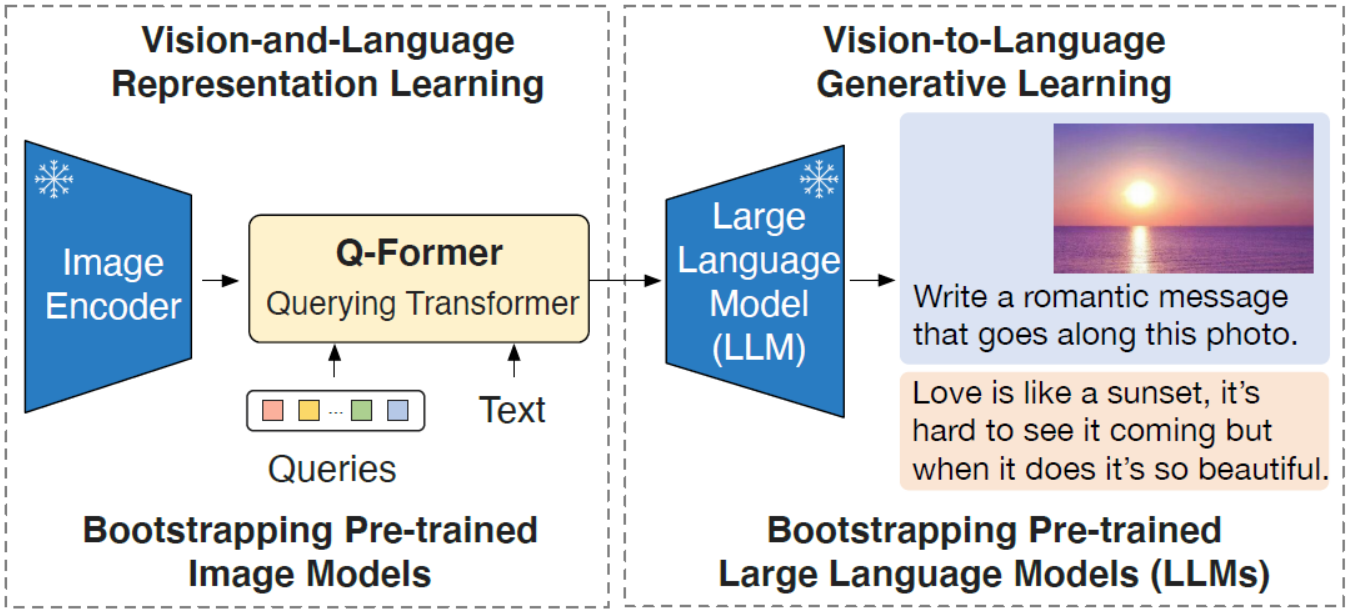
<!-- Figure 1. Overview of BLIP-2's framework. We pre-train a lightweight Querying Transformer following a two-stage strategy to bridge the modality gap. The first stage bootstraps vision-language representation learning from a frozen image encoder. The second stage bootstraps vision-to-language generative learning from a frozen LLM, which enables zero-shot instructed image-to-text generation (see Figure 4 for more examples). -->
图1. BLIP-2 框架概览。我们预训练一个轻量级查询Transformer, 遵循两阶段策略, 以弥补模态差距。**第一阶段**<font color="red">从冻结的图像编码器, 引导视觉-语言表示学习</font>。**第二阶段**<font color="red">从冻结的 LLM, 引导视觉到语言的生成学习</font>, 从而实现零样本指令图像到文本生成(更多示例请参见[图4](#fig.4))。

<!-- We name our VLP framework as BLIP-2: Bootstrapping Language-Image Pre-training with frozen unimodal models. The key advantages of BLIP-2 include: -->
我们将我们的 VLP 框架命名为 BLIP-2: 使用冻结的单模态模型的**B**ootstrapping **L**anguage-**I**mage **P**re-training。BLIP-2 的主要优势包括:

<!-- - BLIP-2 effectively leverages both frozen pre-trained image models and language models. We bridge the modality gap using a Q-Former pre-trained in two-stages: representation learning stage and generative learning stage. BLIP-2 achieves state-of-the-art performance on various vision-language tasks including visual question answering, image captioning, and image-text retrieval. -->
- BLIP-2 有效地利用了冻结的预训练图像模型和语言模型。我们使用两个阶段预训练的 Q-Former, 弥补模态差距: 表示学习阶段和生成学习阶段。BLIP-2 在各种视觉-语言任务上实现了最先进的表现, 包括视觉问答、图像字幕和图像-文本检索。

<!-- - Powered by LLMs (e.g. OPT ([Zhang et al., 2022](#paper.Zhang.2022)), FlanT5 (Chung et al., 2022)), BLIP-2 can be prompted to perform zero-shot image-to-text generation that follows natural language instructions, which enables emerging capabilities such as visual knowledge reasoning, visual conversation, etc. (see Figure 4 for examples). -->
- 在 LLM (例如 OPT ([Zhang et al., 2022](#paper.Zhang.2022)), FlanT5 (Chung et al., 2022))的支持下, BLIP-2 可以被提示以执行零样本图像到文本生成, 生成遵循自然语言指令, 从而实现新兴功能, 例如视觉知识推理、视觉对话等(参见[图4](#fig.4)中的示例)。

> <span id='paper.Zhang.2022'></span> Zhang, S., Roller, S., Goyal, N., Artetxe, M., Chen, M., Chen, S., Dewan, C., Diab, M. T., Li, X., Lin, X. V., Mihaylov, T., Ott, M., Shleifer, S., Shuster, K., Simig, D., Koura, P. S., Sridhar, A., Wang, T., and Zettlemoyer, L. **OPT: open pre-trained transformer language models**. arXiv preprint arXiv:2205.01068, 2022.

<!-- - Due to the use of frozen unimodal models and a lightweight Q-Former, BLIP-2 is more compute-efficient than exisiting state-of-the-arts. For example, BLIP-2 outperforms Flamingo (Alayrac et al., 2022) by 8.7% on zero-shot VQAv2, while using 54× fewer trainable parameters. Furthermore, our results show that BLIP-2 is a generic method that can harvest more advanced unimodal models for better VLP performance. -->
- 由于使用了冻结的单模态模型和轻量级 Q-Former, BLIP-2 的计算效率比现有的最先进技术更高。例如, BLIP-2 在零样本 VQAv2 上的表现比 Flamingo (Alayrac et al., 2022) 提高 8.7%, 同时使用的可训练参数减少 54 倍。此外, 我们的结果表明, BLIP-2 是一种通用方法, 可以收获更先进的单模态模型, 用于更好的 VLP 性能。

# Related Work
## End-to-end Vision-Language Pre-training
<!-- Vision-language pre-training aims to learn multimodal foundation models with improved performance on various vision-and-language tasks. Depending on the downstream task, different model architectures have been proposed, including the dual-encoder architecture (Radford et al., 2021; Jia et al., 2021), the fusion-encoder architecture (Tan & Bansal, 2019; Li et al., 2021), the encoder-decoder architecture (Cho et al., 2021; Wang et al., 2021b; Chen et al., 2022b), and more recently, the unified transformer architecture (Li et al., 2022; Wang et al., 2022b). Various pre-training objectives have also been proposed over the years, and have progressively converged to a few time-tested ones: image-text contrastive learning (Radford et al., 2021; Yao et al., 2022; Li et al., 2021; 2022), image-text matching (Li et al., 2021; 2022; Wang et al., 2021a), and (masked) language modeling (Li et al., 2021; 2022; Yu et al., 2022; Wang et al., 2022b). -->
视觉-语言预训练旨在学习多模态基础模型, 以提高各种视觉和语言任务的性能。根据下游任务, 提出了不同的模型架构, 包括双编码器架构(Radford et al., 2021; Jia et al., 2021)、fusion-编码器架构(Tan & Bansal, 2019; Li et al., 2021)、编码器-解码器架构(Cho et al., 2021; Wang et al., 2021b; Chen et al., 2022b), 以及最近的统一 Transformer 架构(Li et al., 2022; Wang et al., 2022b)。多年来, 各种**预训练目标**也被相继提出, 并逐渐收敛到几个经过时间考验的目标: <font color="red">图像-文本对比学习</font>(Radford et al., 2021; Yao et al., 2022; Li et al., 2021; 2022)、<font color="red">图像-文本匹配</font>(Li et al., 2021; 2022; Wang et al., 2021a)和(已掩码的)<font color="red">语言建模</font>(Li et al., 2021; 2022; Yu et al., 2022; Wang et al., 2022b)。

<!-- Most VLP methods perform end-to-end pre-training using large-scale image-text pair datasets. As the model size keeps increasing, the pre-training can incur an extremely high computation cost. Moreover, it is inflexible for end-to-end pre-trained models to leverage readily-available unimodal pre-trained models, such as LLMs (Brown et al., 2020; Zhang et al., 2022; Chung et al., 2022). -->
大多数 VLP 方法使用大规模图像-文本对数据集执行端到端预训练。随着模型大小的不断增加, 预训练会产生极高的计算成本。此外, 端到端预训练模型无法灵活地利用现成的单模态预训练模型, 例如 LLMs (Brown et al., 2020; Zhang et al., 2022; Chung et al., 2022)。

## Modular Vision-Language Pre-training
<!-- More similar to us are methods that leverage off-the-shelf pre-trained models and keep them frozen during VLP. Some methods freeze the image encoder, including the early work which adopts a frozen object detector to extract visual features (Chen et al., 2020; Li et al., 2020; Zhang et al., 2021), and the recent LiT (Zhai et al., 2022) which uses a frozen pre-trained image encoder for CLIP (Radford et al., 2021) pre-training. Some methods freeze the language model to use the knowledge from LLMs for vision-to-language generation tasks (Tsimpoukelli et al., 2021; Alayrac et al., 2022; Chen et al., 2022a; Tiong et al., 2022; Guo et al., 2022). The key challenge in using a frozen LLM is to align visual features to the text space. To achieve this, Frozen (Tsimpoukelli et al., 2021) finetunes an image encoder whose outputs are directly used as soft prompts for the LLM. Flamingo (Alayrac et al., 2022) inserts new cross-attention layers into the LLM to inject visual features, and pre-trains the new layers on billions of image-text pairs. Both methods adopt the language modeling loss, where the language model generates texts conditioned on the image. -->
与我们更相似的方法是利用现成的预训练模型, 并在 VLP 期间保持它们冻结。一些方法冻结图像编码器, 包括采用冻结的物体检测器提取视觉特征的早期工作(Chen et al., 2020; Li et al., 2020; Zhang et al., 2021), 以及最近的 LiT(Zhai et al., 2022), 它使用冻结的预训练图像编码器, 用于 CLIP (Radford et al., 2021)预训练。一些方法冻结语言模型, 以使用 LLMs 中的知识, 用于视觉到语言的生成任务(Tsimpoukelli et al., 2021; Alayrac et al., 2022; Chen et al., 2022a; Tiong et al., 2022; Guo et al., 2022)。使用冻结的 LLM 的关键挑战是将视觉特征与文本空间对齐。为了实现这一点, *Frozen* ([Tsimpoukelli et al., 2021](#paper.Tsimpoukelli.2021)) 对图像编码器进行微调, 其输出直接用作 LLM 的软提示。Flamingo (Alayrac et al., 2022) 在 LLM 中插入新的交叉注意层以注入视觉特征, 并在数十亿个图像-文本对上对新层进行预训练。这两种方法都采用了语言建模损失, 其中语言模型以图像为条件, 生成文本。
> <span id='paper.Tsimpoukelli.2021'></span> Tsimpoukelli, M., Menick, J. L., Cabi, S., Eslami, S. M., Vinyals, O., & Hill, F. (2021). **Multimodal few-shot learning with frozen language models**. Advances in Neural Information Processing Systems, 34, 200-212.

<!-- Different from existing methods, BLIP-2 can effectively and efficiently leverage both frozen image encoders and frozen LLMs for various vision-language tasks, achieving stronger performance at a lower computation cost. -->
与现有方法不同, BLIP-2 可以有效且高效地利用冻结的图像编码器和冻结的 LLM, 用于各种视觉-语言任务, 以更低的计算成本实现更强大的性能。

# Method
<!-- We propose BLIP-2, a new vision-language pre-training method that bootstraps from frozen pre-trained unimodal models. In order to bridge the modality gap, we propose a Querying Transformer (Q-Former) pre-trained in two stages: (1) vision-language representation learning stage with a frozen image encoder and (2) vision-to-language generative learning stage with a frozen LLM. This section first introduces the model architecture of Q-Former, and then delineates the two-stage pre-training procedures. -->
我们提出 BLIP-2, 一种新的视觉-语言预训练方法, 它从冻结的预训练单模态模型中引导。为了弥合模态差距, 我们提出了 Querying Transformer (Q-Former),它分两个阶段进行预训练: (1) 使用冻结的图像编码器的[视觉-语言表示学习](#Bootstrap-Vision-Language-Representation-Learning-from-a-Frozen-Image-Encoder)阶段; (2) 使用冻结的 LLM 的[视觉到语言生成学习](#Bootstrap-Vision-to-Language-Generative-Learning-from-a-Frozen-LLM)阶段。本节先介绍 Q-Former 的模型架构, 然后描述两阶段预训练过程。

## Model Architecture
<!-- We propose Q-Former as the trainable module to bridge the gap between a frozen image encoder and a frozen LLM. It extracts a fixed number of output features from the image encoder, independent of input image resolution. As shown in Figure 2, Q-Former consists of two transformer submodules that share the same self-attention layers: (1) an image transformer that interacts with the frozen image encoder for visual feature extraction, (2) a text transformer that can function as both a text encoder and a text decoder. We create a set number of learnable query embeddings as input to the image transformer. The queries interact with each other through self-attention layers, and interact with frozen image features through cross-attention layers (inserted every other transformer block). The queries can additionally interact with the text through the same self-attention layers. Depending on the pre-training task, we apply different self-attention masks to control query-text interaction. We initialize Q-Former with the pre-trained weights of $\text{BERT}_\text{base}$ (Devlin et al., 2019), whereas the cross-attention layers are randomly initialized. In total, Q-Former contains 188M parameters. Note that the queries are considered as model parameters. -->
我们提出 Q-Former 作为可训练模块, 以弥补冻结的图像编码器和冻结的 LLM 之间的差距。它<font color="red">从图像编码器中提取固定数量的输出特征, 与输入图像分辨率无关</font>。如[图2](#fig.2)所示, Q-Former <font color="red">包含两个共享相同自注意力层的 transformer 子模块</font>: (1) <font color="blue">图像 transformer, 与冻结的图像编码器交互, 用于视觉特征提取</font>, (2) <font color="green">文本 transformer, 既可以用作文本编码器, 又可以用作文本解码器</font>。我们<font color="red">创建一定数量的可学习查询嵌入作为图像 transformer 的输入</font>。<font color="blue">查询通过自注意力层彼此交互, 并通过交叉注意力层(每隔一个 transformer 块插入)与冻结的图像特征交互</font>。<font color="green">查询还可以通过相同(共享)的自注意力层与文本交互</font>。<font color="red">根据预训练任务, 我们采用不同的自注意力掩码, 以控制查询-文本交互</font>。我们使用 $\text{BERT}_\text{base}$ (Devlin et al., 2019)的预训练权重初始化 Q-Former, 而交叉注意层随机初始化。总的来说, Q-Former 包含 188M 参数。请注意, <font color="red">查询被视为模型参数</font>。

<span id='fig.2'></span>
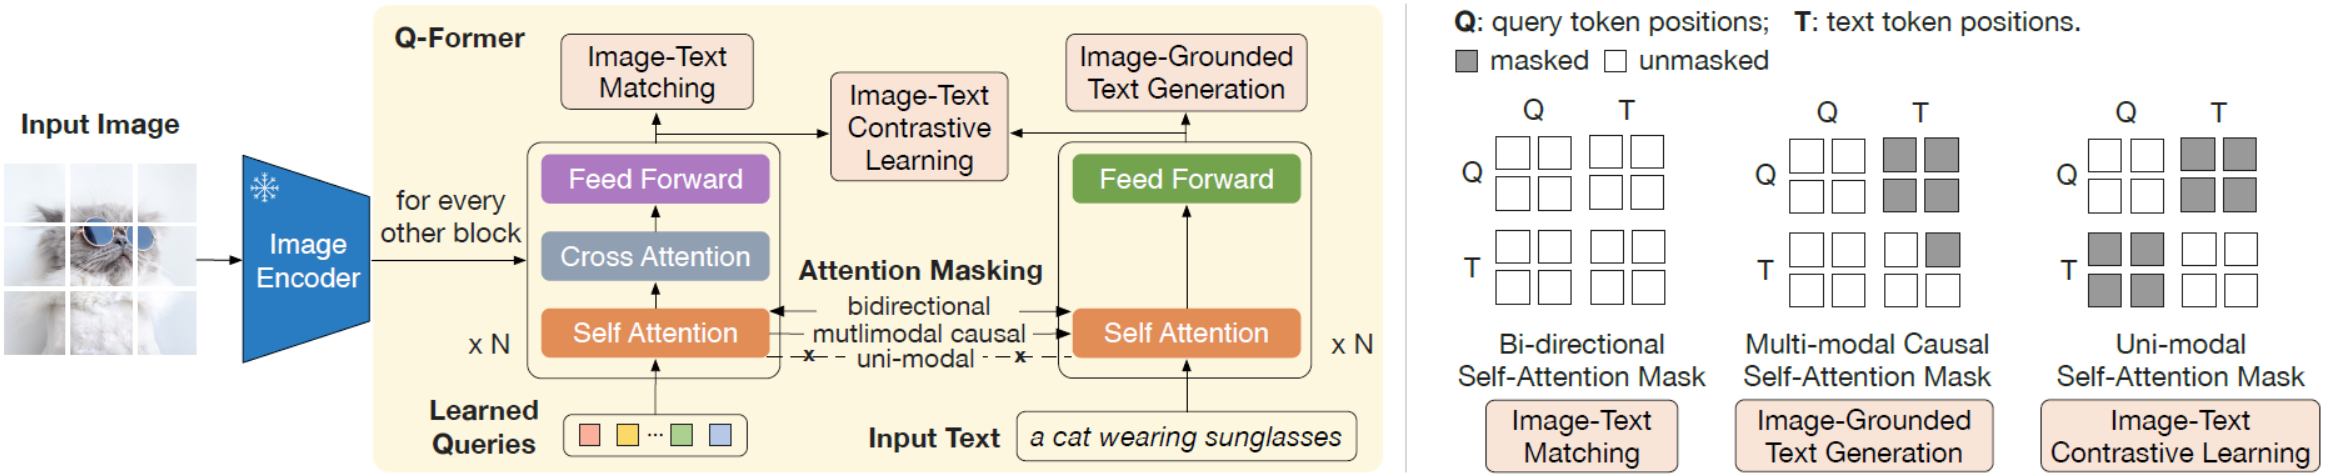
<!-- Figure 2. (Left) Model architecture of Q-Former and BLIP-2's first-stage vision-language representation learning objectives. We jointly optimize three objectives which enforce the queries (a set of learnable embeddings) to extract visual representation most relevant to the text. (Right) The self-attention masking strategy for each objective to control query-text interaction. -->
图2. (左) Q-Former 和 BLIP-2 的第一阶段视觉-语言表示学习目标的模型架构。我们联合优化三个目标, 这些目标强制查询(一组可学习的嵌入)提取与文本最相关的视觉表示。(右) 每个目标的自注意力掩蔽策略, 用于控制查询-文本交互。

<!-- In our experiments, we use 32 queries where each query has a dimension of 768 (same as the hidden dimension of the Q-Former). We use $Z$ to denote the output query representation. The size of $Z$ ($32 \times 768$) is much smaller than the size of frozen image features (e.g. $257 \times 1024$ for ViT-L/14). This bottleneck architecture works together with our pre-training objectives into forcing the queries to extract visual information that is most relevant to the text. -->
在我们的实验中, 我们使用 32 个查询, 其中每个查询的维度为 768(与 Q-Former 的隐藏维度相同)。我们使用 $Z$ 表示输出查询表示。$Z$ 的大小($32 \times 768$)远小于冻结的图像特征的大小(例如, ViT-L/14 的 $257 \times 1024$)。这种瓶颈架构与我们的预训练目标一起工作, 以强制查询提取与文本最相关的视觉信息。

## Bootstrap Vision-Language Representation Learning from a Frozen Image Encoder
<!-- In the representation learning stage, we connect Q-Former to a frozen image encoder and perform pre-training using image-text pairs. We aim to train the Q-Former such that the queries can learn to extract visual representation that is most informative of the text. Inspired by BLIP (Li et al., 2022), we jointly optimize three pre-training objectives that share the same input format and model parameters. Each objective employs a different attention masking strategy between queries and text to control their interaction (see Figure 2). -->
在表示学习阶段, 我们将 Q-Former 连接到一个冻结的图像编码器, 并使用图像-文本对执行预训练。我们的**目标**是训练 Q-Former，<font color="green">使查询可以学习提取最能反映文本信息的视觉表示</font>。受 BLIP (Li et al., 2022)启发, 我们<font color="red">联合优化三个预训练目标, 它们共享相同的输入格式和模型参数。每个目标在查询和文本之间采用不同的注意力掩蔽策略, 以控制它们的交互</font>(见[图2](#fig.2))。

<!-- **Image-Text Contrastive Learning** (ITC) learns to align image representation and text representation such that their mutual information is maximized. It achieves so by contrasting the image-text similarity of a positive pair against those of negative pairs. We align the output query representation $Z$ from the image transformer with the text representation $t$ from the text transformer, where $t$ is the output embedding of the [CLS] token. Since $Z$ contains multiple output embeddings (one from each query), we first compute the pairwise similarity between each query output and $t$, and then select the highest one as the image-text similarity. To avoid information leak, we employ a unimodal self-attention mask, where the queries and text are not allowed to see each other. Due to the use of a frozen image encoder, we can fit more samples per GPU compared to end-to-end methods. Therefore, we use in-batch negatives instead of the momentum queue in BLIP. -->
**图像-文本对比学习** (ITC) 学习将图像表示和文本表示对齐, 以最大化它们的交互信息。它通过将正对的图像-文本相似度与负对的图像-文本相似度进行对比[$^\dagger$](#superscript.dagger), 来实现这一点。我们<font color="red">将图像 transformer 的输出查询表示 $Z$ 与文本 transformer 的文本表示 $t$ 对齐</font>, 其中 $t$ 是 [CLS] 词元的输出嵌入。<font color="red">由于 $Z$ 包含多个输出嵌入(每个查询都有一个), 我们先计算每个查询输出与 $t$ 之间的成对相似度, 然后选择最高的一个作为图像-文本相似度</font>。为了避免信息泄露, 我们采用单模态自注意力掩码, 其中<font color="orange">查询和文本不允许彼此注意</font>。由于使用了冻结的图像编码器, 与端到端方法相比, 我们可以在每个 GPU 上容纳更多样本。因此, 我们使用 in-batch negatives 而不是在 BLIP 中使用的 momentum queue。

> $^\dagger$<span id='superscript.dagger'></span> 即[让正样本(配对的图像-文本对)的相似度尽量高, 同时让负样本(不配对的图像-文本对)的相似度尽量低](https://www.cvmart.net/community/detail/7768)

<!-- **Image-grounded Text Generation** (ITG) loss trains the Q-Former to generate texts, given input images as the condition. Since the architecture of Q-Former does not allow direct interactions between the frozen image encoder and the text tokens, the information required for generating the text must be first extracted by the queries, and then passed to the text tokens via self-attention layers. Therefore, the queries are forced to extract visual features that capture all the information about the text. We employ a multimodal causal self-attention mask to control query-text interaction, similar to the one used in UniLM (Dong et al., 2019). The queries can attend to each other but not the text tokens. Each text token can attend to all queries and its previous text tokens. We also replace the [CLS] token with a new [DEC] token as the first text token to signal the decoding task. -->
**基于图像的文本生成** (ITG) 训练 Q-Former 生成文本，以给定的输入图像作为条件。由于 Q-Former 的架构不允许冻结的图像编码器和文本词元之间直接交互, 因此<font color="red">生成文本所需的信息必须先由查询提取, 然后通过自注意层将信息传递给文本词元</font>。因此, <font color="green">查询被强制提取视觉特征, 这些视觉特征捕获与文本有关的所有信息</font>。我们使用一个多模态因果自注意掩码来控制查询-文本交互, 类似于 UniLM (Dong et al., 2019)中使用的。<font color="orange">查询可以彼此注意, 但不能注意文本词元。每个文本词元都可以注意所有查询及其之前的文本词元</font>。我们还用新的 [DEC] 词元替代 [CLS] 词元, 作为第一个文本词元, 发出解码任务的信号。

<!-- **Image-Text Matching** (ITM) aims to learn fine-grained alignment between image and text representation. It is a binary classification task where the model is asked to predict whether an image-text pair is positive (matched) or negative (unmatched). We use a bi-directional self-attention mask where all queries and texts can attend to each other. The output query embeddings $Z$ thus capture multimodal information. We feed each output query embedding into a two-class linear classifier to obtain a logit, and average the logits across all queries as the output matching score. We adopt the hard negative mining strategy from Li et al. (2021; 2022) to create informative negative pairs. -->
**图像-文本匹配** (ITM) 旨在学习图像和文本表示之间的细粒度对齐。这是一个二元分类任务, 其中模型被要求预测图像-文本对是正(匹配)还是负(不匹配)。我们使用双向自注意力掩码, 其中所有查询和文本都可以彼此注意。因此, 输出查询嵌入 $Z$ 捕获多模态信息。我们将每个输出查询嵌入输入到二分线性分类器中, 以获得一个 logit, 并对所有查询的 logit 取平均值, 作为输出匹配分数。我们采用 Li et al. (2021; 2022) 的 hard negative mining 策略, 创建信息丰富的负(样本图像-文本)对。

## Bootstrap Vision-to-Language Generative Learning from a Frozen LLM

<!-- In the generative pre-training stage, we connect Q-Former (with the frozen image encoder attached) to a frozen LLM to harvest the LLM's generative language capability. As shown in Figure 3, we use a fully-connected (FC) layer to linearly project the output query embeddings $Z$ into the same dimension as the text embedding of the LLM. The projected query embeddings are then prepended to the input text embeddings. They function as soft visual prompts that condition the LLM on visual representation extracted by the Q-Former. Since the Q-Former has been pre-trained to extract language-informative visual representation, it effectively functions as an information bottleneck that feeds the most useful information to the LLM while removing irrelevant visual information. This reduces the burden of the LLM to learn vision-language alignment, thus mitigating the catastrophic forgetting problem. -->
在生成预训练阶段, 我们将 Q-Former (附加了冻结的图像编码器)连接到冻结的 LLM, 以获取 LLM 的生成语言能力。如[图3](#fig.3)所示, 我们使用一个全连接 (FC) 层, 将输出查询嵌入 $Z$ 线性投影到(与 LLM 的文本嵌入相同的)维度。然后, 将投影后的查询嵌入添加到输入文本嵌入的前面。它们充当软视觉提示, 它以 Q-Former 提取的视觉表示作为 LLM 的条件。由于 Q-Former 已经过预训练, 以提取语言信息丰富的视觉表示, 因此它有效地充当了信息瓶颈, 将最有用的信息传输给 LLM, 同时移除不相关的视觉信息。这减轻了 LLM 学习视觉-语言对齐的负担, 从而缓解了灾难性的遗忘问题。

<span id='fig.3'></span>
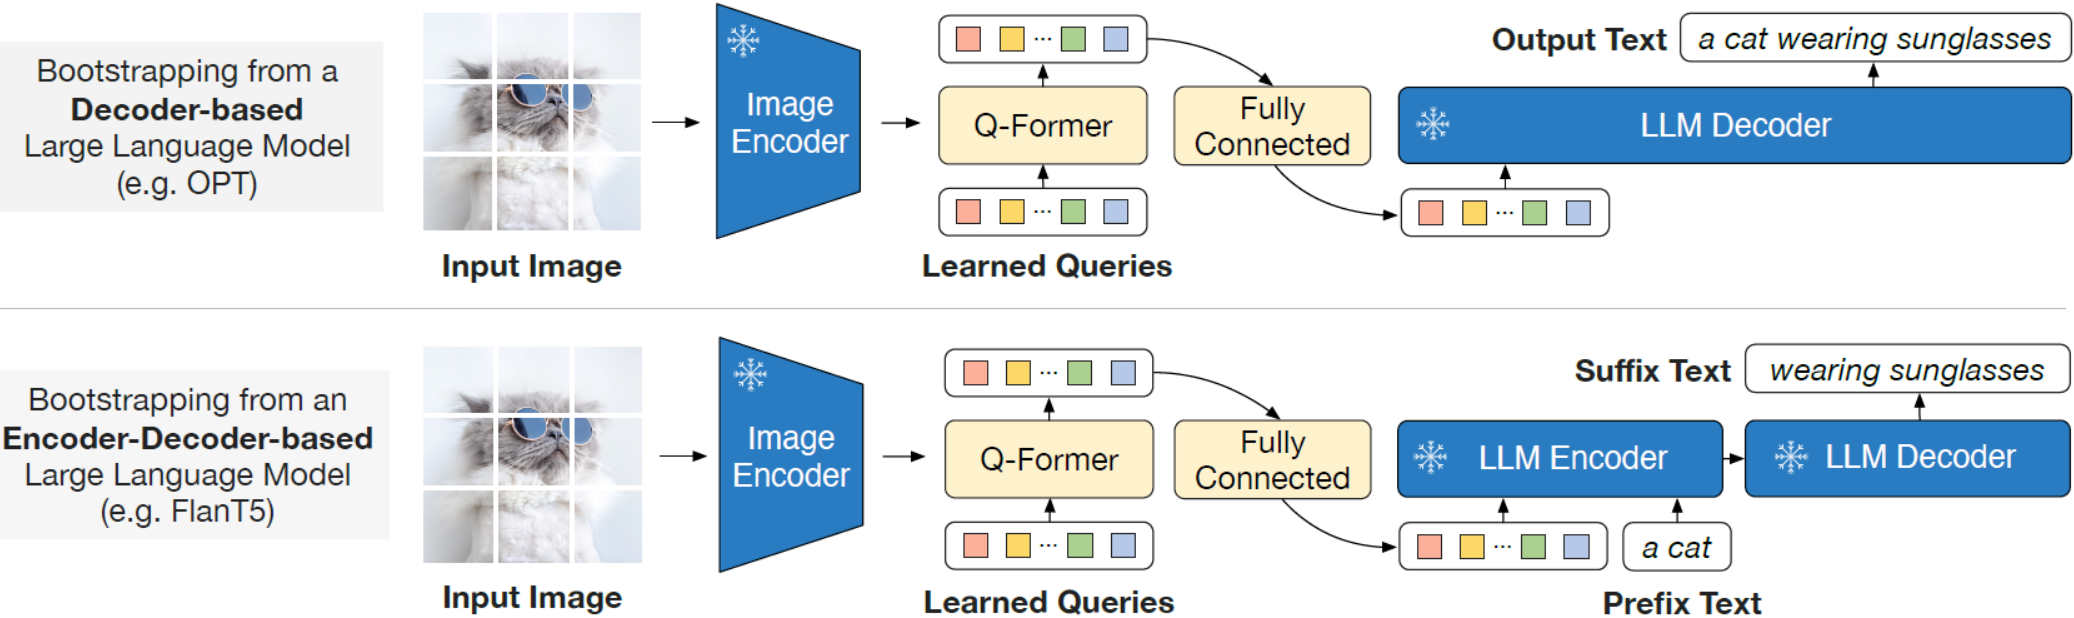
<!-- Figure 3. BLIP-2's second-stage vision-to-language generative pre-training, which bootstraps from frozen large language models (LLMs). (Top) Bootstrapping a decoder-based LLM (e.g. OPT). (Bottom) Bootstrapping an encoder-decoder-based LLM (e.g. FlanT5). The fully-connected layer adapts from the output dimension of the Q-Former to the input dimension of the chosen LLM. -->
图3. BLIP-2 的第二阶段视觉到语言生成预训练, 它从冻结的大语言模型 (LLMs) 引导。(上) 引导基于解码器的 LLM (例如 OPT)。(下) 引导基于编码器-解码器的 LLM (例如 FlanT5)。全连接层从 Q-Former 的输出维度映射到所选 LLM 的输入维度。

<!-- We experiment with two types of LLMs: decoder-based LLMs and encoder-decoder-based LLMs. For decoder-based LLMs, we pre-train with the language modeling loss, where the frozen LLM is tasked to generate the text conditioned on the visual representation from Q-Former. For encoder-decoder-based LLMs, we pre-train with the prefix language modeling loss, where we split a text into two parts. The prefix text is concatenated with the visual representation as input to the LLM's encoder. The suffix text is used as the generation target for the LLM’s decoder. -->
我们尝试了两种类型的 LLMs: 基于解码器的 LLMs 和基于编码器-解码器的 LLMs。对于基于解码器的 LLMs, 我们使用语言建模损失进行预训练, 其中冻结的 LLM 的任务是以 Q-Former 的视觉表示为条件, 生成文本。对于基于编码器-解码器的 LLMs, 我们使用前缀语言建模损失进行预训练, 其中我们将文本分为两部分。
前缀文本与视觉表示连接在一起, 作为 LLMs 编码器的输入。后缀文本用作 LLMs 解码器的生成目标。

## Model Pre-training

<!-- **Pre-training data**. We use the same pre-training dataset as BLIP with 129M images in total, including COCO (Lin et al., 2014), Visual Genome (Krishna et al., 2017), CC3M (Sharma et al., 2018), CC12M (Changpinyo et al., 2021), SBU (Ordonez et al., 2011), and 115M images from the LAION400M dataset (Schuhmann et al., 2021). We adopt the CapFilt method (Li et al., 2022) to create synthetic captions for the web images. Specifically, we generate 10 captions using the BLIPlarge captioning model, and rank the synthetic captions along with the original web caption based on the image-text similarity produced by a CLIP ViT-L/14 model. We keep top-two captions per image as training data and randomly sample one at each pre-training step. -->
**预训练数据**。我们使用与 BLIP 相同的预训练数据集, 共有 129M 图像, 包括COCO (Lin et al., 2014), Visual Genome (Krishna et al., 2017), CC3M (Sharma et al., 2018), CC12M (Changpinyo et al., 2021), SBU (Ordonez et al., 2011) 和来自 LAION400M 数据集(Schuhmann et al., 2021)的 115M 图像。我们<font color="red">采用 CapFilt 方法(Li et al., 2022)为网络图像创建合成字幕</font>。具体而言, 我们<font color="red">使用 BLIPlarge 字幕模型</font>生成 10 个字幕, 并<font color="red">根据 CLIP ViT-L/14 模型提出的图像-文本相似度</font>, 对合成字幕和原始网络字幕进行<font color="red">排序</font>。我们保留每幅图像的前两个字幕, 作为训练数据, 并在每个预训练步, 随机抽取一个。

<!-- **Pre-trained image encoder and LLM**. For the frozen image encoder, we explore two state-of-the-art pre-trained vision transformer models: (1) ViT-L/14 from CLIP (Radford et al., 2021) and (2) ViT-g/14 from EVA-CLIP (Fang et al., 2022). We remove the last layer of the ViT and uses the second last layer's output features, which leads to slightly better performance. For the frozen language model, we explore the unsupervised-trained OPT model family (Zhang et al., 2022) for decoder-based LLMs, and the instruction-trained FlanT5 model family (Chung et al., 2022) for encoder-decoder-based LLMs. -->
**预训练图像编码器和 LLM**。对于冻结的图像编码器, 我们探索了两种最先进的预训练视觉 transformer 模型: <font color="red">(1) CLIP 的 ViT-L/14 (Radford et al., 2021) 和 (2) EVA-CLIP 的 ViT-g/14 (Fang et al., 2022)。我们移除了 ViT 的最后一层, 并使用倒数第二层的输出特征</font>, 这会带来稍微更好的性能。对于冻结的语言模型, 我们探索了<font color="red">基于解码器的 LLMs 的无监督训练的 OPT 模型系列(Zhang et al., 2022), 以及基于编码器-解码器的 LLMs 的指令训练的 FlanT5 模型系列(Chung et al., 2022)</font>。

<!-- **Pre-training settings**. We pre-train for 250k steps in the first stage and 80k steps in the second stage. We use a batch size of 2320/1680 for ViT-L/ViT-g in the first stage and a batch size of 1920/1520 for OPT/FlanT5 in the second stage. During pre-training, we convert the frozen ViTs' and LLMs' parameters into FP16, except for FlanT5 where we use BFloat16. We found no performance degradation compared to using 32-bit models. Due to the use of frozen models, our pre-training is more computational friendly than existing large-scale VLP methods. For example, using a single 16-A100(40G) machine, our largest model with ViT-g and FlanT5-XXL requires less than 6 days for the first stage and less than 3 days for the second stage. -->
**预训练配置**。我们在第一阶段预训练了 25 万步, 在第二阶段预训练了 8 万步。我们在第一阶段对 ViT-L/ViT-g 使用 2320/1680 的批量大小, 在第二阶段对 OPT/FlanT5 使用 1920/1520 的批量大小。在预训练期间, 我们将冻结的 ViTs 和 LLMs 参数转换为 FP16, 但 FlanT5 除外, 我们使用 BFloat16。与使用 32 位模型相比, 我们发现性能没有下降。由于使用了冻结模型, 我们的预训练比现有的大规模 VLP 方法更易于计算。例如, 使用单台 16-A100(40G) 机器, 我们最大的模型(使用 ViT-g 和 FlanT5-XXL)在第一阶段需要不到 6 天的时间, 在第二阶段需要不到 3 天的时间。

<!-- The same set of pre-training hyper-parameters are used for all models. We use the AdamW (Loshchilov & Hutter, 2017) optimizer with $\beta_1 = 0.9$, $\beta_1 = 0.98$, and a weight decay of 0.05. We use a cosine learning rate decay with a peak learning rate of 1e-4 and a linear warmup of 2k steps. The minimum learning rate at the second stage is 5e-5. We use images of size 224×224, augmented with random resized cropping and horizontal flipping. -->
所有模型都使用同一组预训练超参数。我们使用 AdamW (Loshchilov & Hutter, 2017) 优化器, 其中 $\beta_1 = 0.9$, $\beta_1 = 0.98$, 权重衰减为 0.05。我们使用余弦学习率衰减, 峰值学习率为 1e-4, 线性预热为 2k 步。第二阶段的最小学习率为 5e-5。我们使用大小为 $224 \times 224$ 的图像, 并用随机变形裁剪和水平翻转增强。

# Experiment
<!-- Table 1 provides an overview of the performance of BLIP-2 on various zero-shot vision-language tasks. Compared to previous state-of-the-art models, BLIP-2 achieves improved performance while requiring substantially fewer number of trainable parameters during vision-language pre-training. -->
[表1](#table.1)概述了 BLIP-2 在各种零样本视觉-语言任务上的表现。与之前最先进的模型相比, BLIP-2 实现了更高的性能, 同时在视觉-语言预训练期间需要的可训练参数数量大幅减少。

<!-- Table 1. Overview of BLIP-2 results on various zero-shot vision-language tasks. Compared with previous state-of-the-art models. BLIP-2 achieves the highest zero-shot performance while requiring the least number of trainable parameters during vision-language pre-training. -->
表1. <span id='table.1'></span> BLIP-2 在各种零样本视觉-语言任务上的结果概览。与之前最先进的模型相比, BLIP-2 实现了最高的零样本性能, 同时在视觉-语言预训练期间, 需要最少数量的可训练参数。
<table><thead>
  <tr>
    <th style="text-align: left" rowspan="3">Models</th>
    <th style="text-align: center" rowspan="3">#Trainable Params</th>
    <th style="text-align: center" rowspan="3">Open-sourced?</th>
    <th style="text-align: center">Visual Question Answering</th>
    <th style="text-align: center" colspan="2">Image Captioning</th>
    <th style="text-align: center" colspan="2">Image-Text Retrieval</th>
  </tr>
  <tr>
    <th style="text-align: center">VQAv2 (test-dev)</th>
    <th style="text-align: center" colspan="2">NoCaps (val)</th>
    <th style="text-align: center" colspan="2">Flickr (test)</th>
  </tr>
  <tr>
    <th style="text-align: center">VQA acc.</th>
    <th style="text-align: center">CIDEr</th>
    <th style="text-align: center">SPICE</th>
    <th style="text-align: center">TR@1</th>
    <th style="text-align: center">IR@1</th>
  </tr></thead>
<tbody>
  <tr>
    <td style="text-align: left">BLIP (Li et al., 2022)</td>
    <td style="text-align: center">583M</td>
    <td style="text-align: center">&#10004;</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">113.2</td>
    <td style="text-align: center">14.8</td>
    <td style="text-align: center">96.7</td>
    <td style="text-align: center">86.7</td>
  </tr>
  <tr>
    <td style="text-align: left">SimVLM (Wang et al., 2021b)</td>
    <td style="text-align: center">1.4B</td>
    <td style="text-align: center">&#10008;</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">112.2</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
  </tr>
  <tr>
    <td style="text-align: left">BEIT-3 (Wang et al., 2022b)</td>
    <td style="text-align: center">1.9B</td>
    <td style="text-align: center">&#10008;</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">94.9</td>
    <td style="text-align: center">81.5</td>
  </tr>
  <tr>
    <td style="text-align: left">Flamingo (Alayrac et al., 2022)</td>
    <td style="text-align: center">10.2B</td>
    <td style="text-align: center">&#10008;</td>
    <td style="text-align: center">56.3</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
  </tr>
  <tr>
    <td style="text-align: left">BLIP-2</td>
    <td style="text-align: center">188M</td>
    <td style="text-align: center">&#10004;</td>
    <td style="text-align: center"><b>65.0</b></td>
    <td style="text-align: center"><b>121.6</b></td>
    <td style="text-align: center"><b>15.8</b></td>
    <td style="text-align: center"><b>97.6</b></td>
    <td style="text-align: center"><b>89.7</b></td>
  </tr>
</tbody>
</table>

## Instructed Zero-shot Image-to-Text Generation
<!-- BLIP-2 effectively enables a LLM to understand images while preserving its capability in following text prompts, which allows us to control image-to-text generation with instructions. We simply append the text prompt after the visual prompt as input to the LLM. Figure 4 shows examples to demonstrate a wide range of zero-shot image-to-text capabilities including visual knowledge reasoning, visual commensense reasoning, visual conversation, personalized image-to-text generation, etc. -->
BLIP-2 有效地使 LLM 能够理解图像, 同时保留其遵循文本提示的能力, 这使我们能够通过指令控制图像到文本的生成。我们只需将文本提示附加在视觉提示之后, 作为 LLM 的输入。[图4](#fig.4)展示了示例, 以证明范围广泛的零样本图像到文本能力, 包括视觉知识推理、视觉常识推理、视觉对话、个性化图像到文本生成等。

<!-- **Zero-shot VQA**. We perform quantitative evaluation on the zero-shot visual question answering task. For OPT models, we use the prompt “Question: {} Answer:”. For FlanT5 models, we use the prompt “Question: {} Short answer:”. During generation, we use beam search with a beam width of 5. We also set the length-penalty to -1 which encourages shorter answers that align better with human annotation. -->
**零样本 VQA**。我们对零样本视觉-问答任务执行定量评估。对于 OPT 模型, 我们使用提示"Question: {} Answer:"。对于 FlanT5 模型，我们使用提示"Question: {} Short answer:"。在生成过程中, 我们使用光束宽度为 5 的光束搜索。我们还将长度惩罚设置为 -1, 鼓励更短的回答, 该回答更好地与人工注释对齐。

<!-- As shown in Table 2. BLIP-2 achieves state-of-the-art result on the VQAv2 (Goyal et al., 2017) and GQA (Hudson & Manning, 2019) datasets. It outperforms Flamingo80B by 8.7% on VQAv2, despite having 54x fewer trainable parameters. On the OK-VQA (Marino et al., 2019) dataset, BLIP-2 comes secondary to Flamingo80B. We hypothesis that this is because OK-VQA focuses more on open-world knowledge than visual understanding, and the 70B Chinchilla (Hoffmann et al., 2022) language model from Flamingo80B possesses more knowledge than the 11B $\text{FlanT5}_\text{XXL}$. -->
如[表2](#table.2)所示。BLIP-2 在 VQAv2 (Goyal et al., 2017) 和 GQA (Hudson & Manning, 2019) 数据集上取得领先的结果。尽管可训练参数少了 54 倍, 但它在 VQAv2 上比 Flamingo80B 高出 8.7%。在 OK-VQA (Marino et al., 2019) 数据集上, BLIP-2 次于 Flamingo80B。我们假设这是因为 OK-VQA 注重开放世界知识多于视觉理解, 而 Flamingo80B 中的 70B Chinchilla (Hoffmann et al., 2022) 语言模型比 11B $\text{FlanT5}_\text{XXL}$ 拥有更多的知识。

<!-- Table 2. Comparison with state-of-the-art methods on zero-shot visual question answering. -->
表2. <span id='table.2'></span> 在零样本视觉问答上, 与最先进方法的对比。
<table><thead>
  <tr>
    <th style="text-align: center" rowspan="2">Models</th>
    <th style="text-align: center" rowspan="2">#Trainable Params</th>
    <th style="text-align: center" rowspan="2">#Total Params</th>
    <th style="text-align: center" colspan="2">VQAv2</th>
    <th style="text-align: center">OK-VQA</th>
    <th style="text-align: center">GQA</th>
  </tr>
  <tr>
    <th style="text-align: center">val</th>
    <th style="text-align: center">test-dev</th>
    <th style="text-align: center">test</th>
    <th style="text-align: center">test-dev</th>
  </tr></thead>
<tbody>
  <tr>
    <td style="text-align: center">VL-T5no-vqa</td>
    <td style="text-align: center">224M</td>
    <td style="text-align: center">269M</td>
    <td style="text-align: center">13.5</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">5.8</td>
    <td style="text-align: center">6.3</td>
  </tr>
  <tr>
    <td style="text-align: center">FewVLM (Jin et al., 2022)</td>
    <td style="text-align: center">740M</td>
    <td style="text-align: center">785M</td>
    <td style="text-align: center">47.7</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">16.5</td>
    <td style="text-align: center">29.3</td>
  </tr>
  <tr>
    <td style="text-align: center">Frozen (Tsimpoukelli et al., 2021)</td>
    <td style="text-align: center">40M</td>
    <td style="text-align: center">7.1B</td>
    <td style="text-align: center">29.6</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">5.9</td>
    <td style="text-align: center">-</td>
  </tr>
  <tr>
    <td style="text-align: center">VLKD (Dai et al., 2022)</td>
    <td style="text-align: center">406M</td>
    <td style="text-align: center">832M</td>
    <td style="text-align: center">42.6</td>
    <td style="text-align: center">44.5</td>
    <td style="text-align: center">13.3</td>
    <td style="text-align: center">-</td>
  </tr>
  <tr>
    <td style="text-align: center">Flamingo3B (Alayrac et al., 2022)</td>
    <td style="text-align: center">1.4B</td>
    <td style="text-align: center">3.2B</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">49.2</td>
    <td style="text-align: center">41.2</td>
    <td style="text-align: center">-</td>
  </tr>
  <tr>
    <td style="text-align: center">Flamingo9B (Alayrac et al., 2022)</td>
    <td style="text-align: center">1.8B</td>
    <td style="text-align: center">9.3B</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">51.8</td>
    <td style="text-align: center">44.7</td>
    <td style="text-align: center">-</td>
  </tr>
  <tr>
    <td style="text-align: center">Flamingo80B (Alayrac et al., 2022)</td>
    <td style="text-align: center">10.2B</td>
    <td style="text-align: center">80B</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">56.3</td>
    <td style="text-align: center"><b>50.6</b></td>
    <td style="text-align: center">-</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-L OPT}_\text{2.7B}$$</td>
    <td style="text-align: center">104M</td>
    <td style="text-align: center">3.1B</td>
    <td style="text-align: center">50.1</td>
    <td style="text-align: center">49.7</td>
    <td style="text-align: center">30.2</td>
    <td style="text-align: center">33.9</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-g OPT}_\text{2.7B}$$</td>
    <td style="text-align: center">107M</td>
    <td style="text-align: center">3.8B</td>
    <td style="text-align: center">53.5</td>
    <td style="text-align: center">52.3</td>
    <td style="text-align: center">31.7</td>
    <td style="text-align: center">34.6</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-g OPT}_\text{6.7B}$$</td>
    <td style="text-align: center">108M</td>
    <td style="text-align: center">7.8B</td>
    <td style="text-align: center">54.3</td>
    <td style="text-align: center">52.6</td>
    <td style="text-align: center">36.4</td>
    <td style="text-align: center">36.4</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-L FlanT5}_\text{XL}$$</td>
    <td style="text-align: center">103M</td>
    <td style="text-align: center">3.4B</td>
    <td style="text-align: center">62.6</td>
    <td style="text-align: center">62.3</td>
    <td style="text-align: center">39.4</td>
    <td style="text-align: center"><u>44.4</u></td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-g FlanT5}_\text{XL}$$</td>
    <td style="text-align: center">107M</td>
    <td style="text-align: center">4.1B</td>
    <td style="text-align: center"><u>63.1</u></td>
    <td style="text-align: center"><u>63.0</u></td>
    <td style="text-align: center">40.7</td>
    <td style="text-align: center">44.2</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-g FlanT5}_\text{XXL}$$</td>
    <td style="text-align: center">108M</td>
    <td style="text-align: center">12.1B</td>
    <td style="text-align: center"><b>65.2</b></td>
    <td style="text-align: center"><b>65.0</b></td>
    <td style="text-align: center"><u>45.9</u></td>
    <td style="text-align: center"><b>44.7</b></td>
  </tr>
</tbody></table>

<!-- We make a promising observation from Table 2: **a stronger image encoder or a stronger LLM both lead to better performance**. This observation is supported by several facts: (1) ViT-g outperforms ViT-L for both OPT and FlanT5. (2) Within the same LLM family, larger models outperform smaller ones. (3) FlanT5, an instruction-tuned LLM, outperforms the unsupervised-trained OPT on VQA. This observation validates BLIP-2 as a **generic vision-language pre-training method** that can efficiently harvest the rapid advances in vision and natural language communities. -->
我们从[表2](#table.2)中观察到一个有希望的结果: **更强大的图像编码器或更强大的 LLM 都会带来更好的性能**。这一观察由几个事实支持: (1) 对于OPT 和 FlanT5, ViT-g 都优于 ViT-L。(2) 在同一个 LLM 系列中, 较大的模型优于较小的模型。(3) FlanT5 是一种指令调整的 LLM, 在 VQA 上优于无监督训练的 OPT。这一观察验证了 BLIP-2 是一种**通用的视觉-语言预训练方法**, 可以有效地获利于视觉和自然语言社区的快速进步。

<!-- **Effect of Vision-Language Representation Learning**. The first-stage representation learning pre-trains the Q-Former to learn visual features relevant to the text, which reduces the burden of the LLM to learn vision-language alignment. Without the representation learning stage, Q-Former relies solely on the vision-to-language generative learning to bridge the modality gap, which is similar to the Perceiver Resampler in Flamingo. Figure 5 shows the effect of representation learning on generative learning. Without representation learning, both types of LLMs give substantially lower performance on zero-shot VQA. In particular, OPT suffers from catastrophic forgetting where performance drastically degrades as training proceeds. -->
**视觉-语言表示学习的效果**。第一阶段表示学习预训练 Q-Former, 以学习与文本相关的视觉特征, 这减轻了 LLM 学习视觉-语言对齐的负担。没有表示学习阶段, Q-Former 仅依赖视觉到语言生成学习来弥合模态差距, 这类似于 Flamingo 中的Perceiver Resampler。[图5](#fig.5)展示了表示学习对生成学习的影响。没有表征学习, 这两类 LLMs 在零样本 VQA 上的性能都大幅降低。特别是, OPT 遭受灾难性遗忘, 随着训练继续进行, 性能急剧下降。

<span id='fig.5'></span>
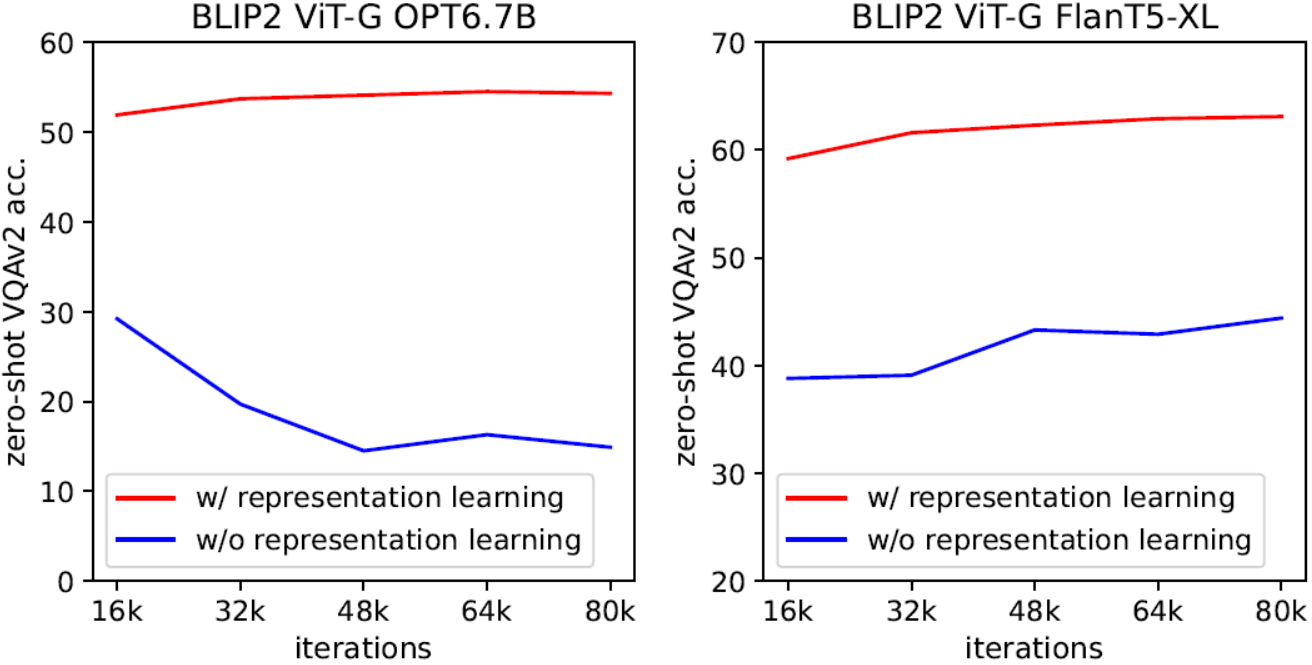
<!-- Figure 5. Effect of vision-language representation learning on vision-to-language generative learning. Without representation learning, the Q-Former fails the bridge the modality gap, leading to significantly lower performance on zero-shot VQA. -->
图5. 视觉语言表示学习对视觉到语言生成学习的影响。没有表示学习, Q-Former 无法弥补模态差距, 导致零样本 VQA 的性能显著下降。

## Image Captioning
<!-- We finetune BLIP-2 models for the image captioning task, which asks the model to generate a text description for the image's visual content. We use the prompt "a photo of" as an initial input to the LLM and trains the model to generate the caption with the language modeling loss. We keep the LLM frozen during finetuning, and updates the parameters of the Q-Former together with the image encoder. We experiment with ViT-g and various LLMs. Detailed hyperparameters can be found in the appendix. We perform finetuning on COCO, and evaluate on both COCO test set and zero-shot transfer to NoCaps (Agrawal et al., 2019) validation set. -->
针对图像字幕任务, 我们对 BLIP-2 模型进行微调, 该任务要求模型为图像的视觉内容生成文本描述。我们使用提示 "a photo of" 作为 LLM 的初始输入, 并使用语言建模损失, 训练模型以生成字幕。在微调期间, 我们保持 LLM 冻结, 并同时更新 Q-Former 和图像编码器的参数。我们尝试使用 ViT-g 和各种 LLMs。详细的超参数见[表7](#table.7)。我们在 COCO 数据集上执行微调, 在 COCO 测试集进行评估, 零样本迁移到 NoCaps (Agrawal et al., 2019) 验证集。

<!-- Table 7. Hyperparameters for fine-tuning BLIP-2 with ViT-g on COCO captioning. -->
表7. <span id='table.7'></span> 在 COCO 字幕上用于微调使用 ViT-g 的 BLIP-2 的超参数。
<table><thead>
  <tr>
    <th style="text-align: left">LLM</th>
    <th style="text-align: center">$$\text{FlanT5}_\text{XL}$$</th>
    <th style="text-align: center">$$\text{OPT}_\text{2.7B}$$</th>
    <th style="text-align: center">$$\text{OPT}_\text{6.7B}$$</th>
  </tr></thead>
<tbody>
  <tr>
    <td style="text-align: left">Fine-tuning epochs</td>
    <td style="text-align: center" colspan="3">5</td>
  </tr>
  <tr>
    <td style="text-align: left">Warmup steps</td>
    <td style="text-align: center" colspan="3">1000</td>
  </tr>
  <tr>
    <td style="text-align: left">Learning rate</td>
    <td style="text-align: center" colspan="3">1e-5</td>
  </tr>
  <tr>
    <td style="text-align: left">Batch size</td>
    <td style="text-align: center" colspan="3">256</td>
  </tr>
  <tr>
    <td style="text-align: left">AdamW $\beta$</td>
    <td style="text-align: center" colspan="3">(0.9,0.999)</td>
  </tr>
  <tr>
    <td style="text-align: left">Weight decay</td>
    <td style="text-align: center" colspan="3">0.05</td>
  </tr>
  <tr>
    <td style="text-align: left">Drop path</td>
    <td style="text-align: center" colspan="3">0</td>
  </tr>
  <tr>
    <td style="text-align: left">Image resolution</td>
    <td style="text-align: center" colspan="3">364</td>
  </tr>
  <tr>
    <td style="text-align: left">Prompt</td>
    <td style="text-align: center" colspan="3">"a photo of"</td>
  </tr>
  <tr>
    <td style="text-align: left">Inference beam size</td>
    <td style="text-align: center" colspan="3">5</td>
  </tr>
  <tr>
    <td style="text-align: left">Layer-wise learning rate decay for ViT</td>
    <td style="text-align: center">1</td>
    <td style="text-align: center">1</td>
    <td style="text-align: center">0.95</td>
  </tr>
</tbody>
</table>

<!-- The results are shown in Table 3. BLIP-2 achieves state-of-the-art performance with significant improvement on NoCaps over existing methods, demonstrating strong generalization ability to out-domain images. -->
结果如[表3](#table.3)所示。与现有方法相比, BLIP-2 实现了最先进的性能, 以及 NoCaps 上的显著改进, 展示了对 out-domain 图像的强大泛化能力。

<!-- Table 3. Comparison with state-of-the-art image captioning methods on NoCaps and COCO Caption. All methods optimize the crossentropy loss during finetuning. C: CIDEr, S: SPICE, B@4: BLEU@4. -->
表3. <span id='table.3'></span> 与最先进的图像字幕方法在 NoCaps 和 COCO Caption 上的对比。所有方法在微调期间, 都优化交叉熵损失。C: CIDEr, S: SPICE, B@4: BLEU@4。
<table><thead>
  <tr>
    <th style="text-align: center" rowspan="3">Models</th>
    <th style="text-align: center" rowspan="3">#Trainable Params</th>
    <th style="text-align: center" colspan="8">NoCaps Zero-shot (validation set)</th>
    <th style="text-align: center" colspan="2">COCO Fine-tuned</th>
  </tr>
  <tr>
    <th style="text-align: center" colspan="2">in-domain</th>
    <th style="text-align: center" colspan="2">near-domain</th>
    <th style="text-align: center" colspan="2">out-domain</th>
    <th style="text-align: center" colspan="2">overall</th>
    <th style="text-align: center" colspan="2">Karpathy test</th>
  </tr>
  <tr>
    <th style="text-align: center">C</th>
    <th style="text-align: center">S</th>
    <th style="text-align: center">C</th>
    <th style="text-align: center">S</th>
    <th style="text-align: center">C</th>
    <th style="text-align: center">S</th>
    <th style="text-align: center">C</th>
    <th style="text-align: center">S</th>
    <th style="text-align: center">B@4</th>
    <th style="text-align: center">C</th>
  </tr></thead>
<tbody>
  <tr>
    <td style="text-align: center">OSCAR (Li et al., 2020)</td>
    <td style="text-align: center">345M</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">80.9</td>
    <td style="text-align: center">11.3</td>
    <td style="text-align: center">37.4</td>
    <td style="text-align: center">127.8</td>
  </tr>
  <tr>
    <td style="text-align: center">VinVL (Zhang et al., 2021)</td>
    <td style="text-align: center">345M</td>
    <td style="text-align: center">103.1</td>
    <td style="text-align: center">14.2</td>
    <td style="text-align: center">96.1</td>
    <td style="text-align: center">13.8</td>
    <td style="text-align: center">88.3</td>
    <td style="text-align: center">12.1</td>
    <td style="text-align: center">95.5</td>
    <td style="text-align: center">13.5</td>
    <td style="text-align: center">38.2</td>
    <td style="text-align: center">129.3</td>
  </tr>
  <tr>
    <td style="text-align: center">BLIP (Li et al., 2022)</td>
    <td style="text-align: center">446M</td>
    <td style="text-align: center">114.9</td>
    <td style="text-align: center">15.2</td>
    <td style="text-align: center">112.1</td>
    <td style="text-align: center">14.9</td>
    <td style="text-align: center">115.3</td>
    <td style="text-align: center">14.4</td>
    <td style="text-align: center">113.2</td>
    <td style="text-align: center">14.8</td>
    <td style="text-align: center">40.4</td>
    <td style="text-align: center">136.7</td>
  </tr>
  <tr>
    <td style="text-align: center">OFA (Wang et al., 2022a)</td>
    <td style="text-align: center">930M</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center"><b>43.9</b></td>
    <td style="text-align: center"><u>145.3</u></td>
  </tr>
  <tr>
    <td style="text-align: center">Flamingo (Alayrac et al., 2022)</td>
    <td style="text-align: center">10.6B</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">138.1</td>
  </tr>
  <tr>
    <td style="text-align: center">SimVLM (Wang et al., 2021b)</td>
    <td style="text-align: center">$$\sim 1.4B$$</td>
    <td style="text-align: center">113.7</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">110.9</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">115.2</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">112.2</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">40.6</td>
    <td style="text-align: center">143.3</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-g OPT}_\text{2.7B}$$</td>
    <td style="text-align: center">1.1B</td>
    <td style="text-align: center"><u>123.0</u></td>
    <td style="text-align: center"><u>15.8</u></td>
    <td style="text-align: center">117.8</td>
    <td style="text-align: center"><u>15.4</u></td>
    <td style="text-align: center">123.4</td>
    <td style="text-align: center"><b>15.1</b></td>
    <td style="text-align: center">119.7</td>
    <td style="text-align: center"><u>15.4</u></td>
    <td style="text-align: center"><u>43.7</u></td>
    <td style="text-align: center"><b>145.8</b></td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-g OPT}_\text{6.7B}$$</td>
    <td style="text-align: center">1.1B</td>
    <td style="text-align: center"><b>123.7</b></td>
    <td style="text-align: center"><u>15.8</u></td>
    <td style="text-align: center"><u>119.2</u></td>
    <td style="text-align: center">15.3</td>
    <td style="text-align: center"><u>124.4</u></td>
    <td style="text-align: center">14.8</td>
    <td style="text-align: center"><u>121.0</u></td>
    <td style="text-align: center">15.3</td>
    <td style="text-align: center">43.5</td>
    <td style="text-align: center">145.2</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-g FlanT5}_\text{XL}$$</td>
    <td style="text-align: center">1.1B</td>
    <td style="text-align: center"><b>123.7</b></td>
    <td style="text-align: center"><b>16.3</b></td>
    <td style="text-align: center"><b>120.2</b></td>
    <td style="text-align: center"><b>15.9</b></td>
    <td style="text-align: center"><b>124.8</b></td>
    <td style="text-align: center"><b>15.1</b></td>
    <td style="text-align: center"><b>121.6</b></td>
    <td style="text-align: center"><b>15.8</b></td>
    <td style="text-align: center">42.4</td>
    <td style="text-align: center">144.5</td>
  </tr>
</tbody></table>

## Visual Question Answering
<!-- Given annotated VQA data, we finetune the parameters of the Q-Former and the image encoder while keeping the LLM frozen. We finetune with the open-ended answer generation loss, where the LLM receives Q-Former's output and the question as input, and is asked to generate the answer. In order to extract image features that are more relevant to the question, we additionally condition Q-Former on the question. Specifically, the question tokens are given as input to the Q-Former and interact with the queries via the self-attention layers, which can guide the Q-Former's cross-attention layers to focus on more informative image regions. -->
给定标注的 VQA 数据, 我们微调 Q-Former 和图像编码器的参数, 同时保持 LLM 冻结。我们使用开放式回答生成损失进行微调, 其中 LLM 接收 Q-Former 的输出和问题作为输入, 并被要求生成回答。为了提取与问题更相关的图像特征, 我们还令 Q-Former 以问题为条件。具体来说, 问题词元作为 Q-Former 的输入, 并通过自注意力层与查询进行交互, 这可以引导 Q-Former 的交叉注意力层聚焦于信息更丰富的图像区域。

<!-- Following BLIP, our VQA data includes the training and validation splits from VQAv2, as well as training samples from Visual Genome. Table 4 demonstrates the state-of-the-art results of BLIP-2 among open-ended generation models. -->
遵循 BLIP, 我们的 VQA 数据包括来自 VQAv2 的训练和验证分割, 以及来自 Visual Genome 的训练样本。[表4](#table.4)展示了 BLIP-2 在开放式生成模型中的领先结果。

<!-- Table 4. Comparison with state-of-the-art models fine-tuned for visual question answering. -->
表4. <span id='table.4'></span> 对比最先进模型, 这些模型被微调用于视觉问答。
<table><thead>
  <tr>
    <th style="text-align: center" rowspan="2">Models</th>
    <th style="text-align: center" rowspan="2">#Trainable Params</th>
    <th style="text-align: center" colspan="2">VQAv2</th>
  </tr>
  <tr>
    <th style="text-align: center">val</th>
    <th style="text-align: center">test-dev</th>
  </tr></thead>
<tbody>
  <tr>
    <td style="text-align: left" colspan="4">$\textit{Open-ended generation models}$</td>
  </tr>
  <tr>
    <td style="text-align: center">ALBEF (Li et al., 2021)</td>
    <td style="text-align: center">314M</td>
    <td style="text-align: center">75.84</td>
    <td style="text-align: center">76.04</td>
  </tr>
  <tr>
    <td style="text-align: center">BLIP (Li et al., 2022)</td>
    <td style="text-align: center">385M</td>
    <td style="text-align: center">78.25</td>
    <td style="text-align: center">78.32</td>
  </tr>
  <tr>
    <td style="text-align: center">OFA (Wang et al., 2022a</td>
    <td style="text-align: center">930M</td>
    <td style="text-align: center">82.00</td>
    <td style="text-align: center">82.00</td>
  </tr>
  <tr>
    <td style="text-align: center">Flamingo80B (Alayrac et al., 2022)</td>
    <td style="text-align: center">10.6B</td>
    <td style="text-align: center">82.00</td>
    <td style="text-align: center">82.10</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-g FlanT5}_\text{XL}$$</td>
    <td style="text-align: center">1.2B</td>
    <td style="text-align: center">81.55</td>
    <td style="text-align: center">81.66</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-g OPT}_\text{2.7B}$$</td>
    <td style="text-align: center">1.2B</td>
    <td style="text-align: center">81.59</td>
    <td style="text-align: center">81.74</td>
  </tr>
  <tr>
    <td style="text-align: center">$$\text{BLIP-2 ViT-g OPT}_\text{6.7B}$$</td>
    <td style="text-align: center">1.2B</td>
    <td style="text-align: center">$$\textbf{82.19}$$</td>
    <td style="text-align: center">$$\textbf{82.30}$$</td>
  </tr>
  <tr>
    <td style="text-align: left" colspan="4">$\textit{Closed-ended classification models}$</td>
  </tr>
  <tr>
    <td style="text-align: center">VinVL</td>
    <td style="text-align: center">345M</td>
    <td style="text-align: center">76.52</td>
    <td style="text-align: center">76.60</td>
  </tr>
  <tr>
    <td style="text-align: center">SimVLM (Wang et al., 2021b)</td>
    <td style="text-align: center">$$\sim 1.4B$$</td>
    <td style="text-align: center">80.03</td>
    <td style="text-align: center">80.34</td>
  </tr>
  <tr>
    <td style="text-align: center">CoCa (Yu et al., 2022)</td>
    <td style="text-align: center">2.1B</td>
    <td style="text-align: center">82.30</td>
    <td style="text-align: center">82.30</td>
  </tr>
  <tr>
    <td style="text-align: center">BEIT-3 (Wang et al., 2022b)</td>
    <td style="text-align: center">1.9B</td>
    <td style="text-align: center">$$\textbf{84.19}$$</td>
    <td style="text-align: center">$$\textbf{84.03}$$</td>
  </tr>
</tbody></table>

<!-- Table 8. Hyperparameters for fine-tuning BLIP-2 with ViT-g on VQA. -->
表8. <span id='table.8'></span> 在 VQA 上用于微调使用 ViT-g 的 BLIP-2 的超参数。
<table><thead>
  <tr>
    <th style="text-align: left">LLM</th>
    <th style="text-align: center">$$\text{FlanT5}_\text{XL}$$</th>
    <th style="text-align: center">$$\text{OPT}_\text{2.7B}$$</th>
    <th style="text-align: center">$$\text{OPT}_\text{6.7B}$$</th>
  </tr></thead>
<tbody>
  <tr>
    <td style="text-align: left">Fine-tuning epochs</td>
    <td style="text-align: center" colspan="3">5</td>
  </tr>
  <tr>
    <td style="text-align: left">Warmup steps</td>
    <td style="text-align: center" colspan="3">1000</td>
  </tr>
  <tr>
    <td style="text-align: left">Learning rate</td>
    <td style="text-align: center" colspan="3">1e-5</td>
  </tr>
  <tr>
    <td style="text-align: left">Batch size</td>
    <td style="text-align: center" colspan="3">128</td>
  </tr>
  <tr>
    <td style="text-align: left">AdamW $\beta$</td>
    <td style="text-align: center" colspan="3">(0.9,0.999)</td>
  </tr>
  <tr>
    <td style="text-align: left">Weight decay</td>
    <td style="text-align: center" colspan="3">0.05</td>
  </tr>
  <tr>
    <td style="text-align: left">Drop path</td>
    <td style="text-align: center" colspan="3">0</td>
  </tr>
  <tr>
    <td style="text-align: left">Image resolution</td>
    <td style="text-align: center" colspan="3">490</td>
  </tr>
  <tr>
    <td style="text-align: left">Prompt</td>
    <td style="text-align: center" colspan="3">"Question: {} Answer:"</td>
  </tr>
  <tr>
    <td style="text-align: left">Inference beam size</td>
    <td style="text-align: center" colspan="3">5</td>
  </tr>
  <tr>
    <td style="text-align: left">Layer-wise learning rate decay for ViT</td>
    <td style="text-align: center">0.95</td>
    <td style="text-align: center">0.95</td>
    <td style="text-align: center">0.9</td>
  </tr>
</tbody>
</table>

## Image-Text Retrieval
<!-- Since image-text retrieval does not involve language generation, we directly finetune the first-stage-pretrained model w/o LLM. Specifically, we finetune the image encoder together with Q-Former on COCO using the same objectives (i.e. ITC, ITM, and ITG) as pre-training. We then evaluate the model for both image-to-text retrieval and text-to-image retrieval on COCO and Flickr30K (Plummer et al., 2015) datasets. During inference, we follow Li et al. (2021; 2022) which first select $k = 128$ candidates based on the image-text feature similarity, followed by a re-ranking based on pairwise ITM scores. We experiment with both ViT-L and ViT-g as the image encoder. Detailed hyperparameters can be found in the appendix. -->
因为图文检索不涉及语言生成, 我们直接微调第一阶段预训练的无 LLM 的模型。具体而言, 我们使用与预训练相同的目标(即 ITC、ITM 和 ITG), 在 COCO 上微调图像编码器和 Q-Former。然后，我们在 COCO 和 Flickr30K (Plummer et al., 2015) 数据集上, 评估该模型的图像到文本检索和文本到图像检索。在推理期间, 我们遵循 Li et al. (2021; 2022), 其先基于图文特征相似性选择 $k = 128$ 个候选者, 然后基于成对 ITM 得分重新排序。我们尝试使用 ViT-L 和 ViT-g 作为图像编码器。详细的超参数见[表9](#table.9)。

<!-- Table 9. Hyperparameters for fine-tuning BLIP-2 on COCO image-text retrieval. -->
表9. <span id='table.9'></span> 在 COCO 图像-文本检索任务上用于微调 BLIP-2 的超参数。
<table><thead>
  <tr>
    <th style="text-align: left">LLM</th>
    <th style="text-align: center">ViT-L/14</th>
    <th style="text-align: center">ViT-g/14</th>
  </tr></thead>
<tbody>
  <tr>
    <td style="text-align: left">Fine-tuning epochs</td>
    <td style="text-align: center" colspan="2">5</td>
  </tr>
  <tr>
    <td style="text-align: left">Warmup steps</td>
    <td style="text-align: center" colspan="2">1000</td>
  </tr>
  <tr>
    <td style="text-align: left">Learning rate</td>
    <td style="text-align: center">5e-6</td>
    <td style="text-align: center">1e-5</td>
  </tr>
  <tr>
    <td style="text-align: left">Batch size</td>
    <td style="text-align: center" colspan="2">224</td>
  </tr>
  <tr>
    <td style="text-align: left">AdamW $\beta$</td>
    <td style="text-align: center">(0.9,0.98)</td>
    <td style="text-align: center">(0.9,0.999)</td>
  </tr>
  <tr>
    <td style="text-align: left">Weight decay</td>
    <td style="text-align: center" colspan="2">0.05</td>
  </tr>
  <tr>
    <td style="text-align: left">Drop path</td>
    <td style="text-align: center" colspan="2">0</td>
  </tr>
  <tr>
    <td style="text-align: left">Image resolution</td>
    <td style="text-align: center" colspan="2">364</td>
  </tr>
  <tr>
    <td style="text-align: left">Layer-wise learning rate decay for ViT</td>
    <td style="text-align: center">1</td>
    <td style="text-align: center">0.95</td>
  </tr>
</tbody>
</table>

<!-- The results are shown in Table 5. BLIP-2 achieves state-of-the-art performance with significant improvement over existing methods on zero-shot image-text retrieval. -->
结果如[表5](#table.5)所示。与现有方法相比, BLIP-2 在零样本图像-文本检索方面实现了最先进的性能及显著改进。

<!-- Table 5. Comparison with state-of-the-art image-text retrieval methods, finetuned on COCO and zero-shot transferred to Flickr30K. -->
表5. <span id='table.5'></span> 与最先进的图像-文本检索方法的比较, 在 COCO 上进行微调以及零样本转移到 Flickr30K。
<table><thead>
  <tr>
    <th style="text-align: left" rowspan="3">Model</th>
    <th style="text-align: center" rowspan="3">#Trainable Params</th>
    <th style="text-align: center" colspan="6">Flickr30K Zero-shot (1K test set)</th>
    <th style="text-align: center" colspan="6">COCO Fine-tuned (5K test set)</th>
  </tr>
  <tr>
    <th style="text-align: center" colspan="3">Image $\to$ Text</th>
    <th style="text-align: center" colspan="3">Text $\to$ Image</th>
    <th style="text-align: center" colspan="3">Image $\to$ Text</th>
    <th style="text-align: center" colspan="3">Text $\to$ Image</th>
  </tr>
  <tr>
    <th style="text-align: center">R@1</th>
    <th style="text-align: center">R@5</th>
    <th style="text-align: center">R@10</th>
    <th style="text-align: center">R@1</th>
    <th style="text-align: center">R@5</th>
    <th style="text-align: center">R@10</th>
    <th style="text-align: center">R@1</th>
    <th style="text-align: center">R@5</th>
    <th style="text-align: center">R@10</th>
    <th style="text-align: center">R@1</th>
    <th style="text-align: center">R@5</th>
    <th style="text-align: center">R@10</th>
  </tr></thead>
<tbody>
  <tr>
    <td style="text-align: left" colspan="14"><i>Dual-encoder models</i></td>
  </tr>
  <tr>
    <td style="text-align: left">CLIP (Radford et al., 2021)</td>
    <td style="text-align: center">428M</td>
    <td style="text-align: center">88.0</td>
    <td style="text-align: center">98.7</td>
    <td style="text-align: center">99.4</td>
    <td style="text-align: center">68.7</td>
    <td style="text-align: center">90.6</td>
    <td style="text-align: center">95.2</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
  </tr>
  <tr>
    <td style="text-align: left">ALIGN (Jia et al., 2021)</td>
    <td style="text-align: center">820M</td>
    <td style="text-align: center">88.6</td>
    <td style="text-align: center">98.7</td>
    <td style="text-align: center">99.7</td>
    <td style="text-align: center">75.7</td>
    <td style="text-align: center">93.8</td>
    <td style="text-align: center">96.8</td>
    <td style="text-align: center">77.0</td>
    <td style="text-align: center">93.5</td>
    <td style="text-align: center">96.9</td>
    <td style="text-align: center">59.9</td>
    <td style="text-align: center">83.3</td>
    <td style="text-align: center">89.8</td>
  </tr>
  <tr>
    <td style="text-align: left">FILIP (Yao et al., 2022)</td>
    <td style="text-align: center">417M</td>
    <td style="text-align: center">89.8</td>
    <td style="text-align: center">99.2</td>
    <td style="text-align: center">99.8</td>
    <td style="text-align: center">75.0</td>
    <td style="text-align: center">93.4</td>
    <td style="text-align: center">96.3</td>
    <td style="text-align: center">78.9</td>
    <td style="text-align: center">94.4</td>
    <td style="text-align: center">97.4</td>
    <td style="text-align: center">61.2</td>
    <td style="text-align: center">84.3</td>
    <td style="text-align: center">90.6</td>
  </tr>
  <tr>
    <td style="text-align: left">Florence (Yuan et al., 2021)</td>
    <td style="text-align: center">893M</td>
    <td style="text-align: center">90.9</td>
    <td style="text-align: center">99.1</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">76.7</td>
    <td style="text-align: center">93.6</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">81.8</td>
    <td style="text-align: center">95.2</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">63.2</td>
    <td style="text-align: center">85.7</td>
    <td style="text-align: center">-</td>
  </tr>
  <tr>
    <td style="text-align: left">BEIT-3(Wang et al., 2022b)</td>
    <td style="text-align: center">1.9B</td>
    <td style="text-align: center">94.9</td>
    <td style="text-align: center">99.9</td>
    <td style="text-align: center"><b>100.0</b></td>
    <td style="text-align: center">81.5</td>
    <td style="text-align: center">95.6</td>
    <td style="text-align: center">97.8</td>
    <td style="text-align: center"><u>84.8</u></td>
    <td style="text-align: center"><u>96.5</u></td>
    <td style="text-align: center"><u>98.3</u></td>
    <td style="text-align: center"><u>67.2</u></td>
    <td style="text-align: center"><b>87.7</b></td>
    <td style="text-align: center"><b>92.8</b></td>
  </tr>
  <tr>
    <td style="text-align: left" colspan="14"><i>Fusion-encoder models</i></td>
  </tr>
  <tr>
    <td style="text-align: left">UNITER (Chen et al., 2020)</td>
    <td style="text-align: center">303M</td>
    <td style="text-align: center">83.6</td>
    <td style="text-align: center">95.7</td>
    <td style="text-align: center">97.7</td>
    <td style="text-align: center">68.7</td>
    <td style="text-align: center">89.2</td>
    <td style="text-align: center">93.9</td>
    <td style="text-align: center">65.7</td>
    <td style="text-align: center">88.6</td>
    <td style="text-align: center">93.8</td>
    <td style="text-align: center">52.9</td>
    <td style="text-align: center">79.9</td>
    <td style="text-align: center">88.0</td>
  </tr>
  <tr>
    <td style="text-align: left">OSCAR (Li et al., 2020)</td>
    <td style="text-align: center">345M</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">70.0</td>
    <td style="text-align: center">91.1</td>
    <td style="text-align: center">95.5</td>
    <td style="text-align: center">54.0</td>
    <td style="text-align: center">80.8</td>
    <td style="text-align: center">88.5</td>
  </tr>
  <tr>
    <td style="text-align: left">VinVL (Zhang et al., 2021)</td>
    <td style="text-align: center">345M</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">-</td>
    <td style="text-align: center">75.4</td>
    <td style="text-align: center">92.9</td>
    <td style="text-align: center">96.2</td>
    <td style="text-align: center">58.8</td>
    <td style="text-align: center">83.5</td>
    <td style="text-align: center">90.3</td>
  </tr>
  <tr>
    <td style="text-align: left" colspan="14"><i>Dual encoder + Fusion encoder reranking</i></td>
  </tr>
  <tr>
    <td style="text-align: left">ALBEF (Li et al., 2021)</td>
    <td style="text-align: center">233M</td>
    <td style="text-align: center">94.1</td>
    <td style="text-align: center">99.5</td>
    <td style="text-align: center">99.7</td>
    <td style="text-align: center">82.8</td>
    <td style="text-align: center">96.3</td>
    <td style="text-align: center">98.1</td>
    <td style="text-align: center">77.6</td>
    <td style="text-align: center">94.3</td>
    <td style="text-align: center">97.2</td>
    <td style="text-align: center">60.7</td>
    <td style="text-align: center">84.3</td>
    <td style="text-align: center">90.5</td>
  </tr>
  <tr>
    <td style="text-align: left">BLIP (Li et al., 2022)</td>
    <td style="text-align: center">446M</td>
    <td style="text-align: center">96.7</td>
    <td style="text-align: center"><b>100.0</b></td>
    <td style="text-align: center"><b>100.0</b></td>
    <td style="text-align: center">86.7</td>
    <td style="text-align: center">97.3</td>
    <td style="text-align: center">98.7</td>
    <td style="text-align: center">82.4</td>
    <td style="text-align: center">95.4</td>
    <td style="text-align: center">97.9</td>
    <td style="text-align: center">65.1</td>
    <td style="text-align: center">86.3</td>
    <td style="text-align: center">91.8</td>
  </tr>
  <tr>
    <td style="text-align: left"><b>BLIP-2</b> ViT-L</td>
    <td style="text-align: center">474M</td>
    <td style="text-align: center"><u>96.9</u></td>
    <td style="text-align: center"><b>100.0</b></td>
    <td style="text-align: center"><b>100.0</b></td>
    <td style="text-align: center"><u>88.6</u></td>
    <td style="text-align: center"><u>97.6</u></td>
    <td style="text-align: center"><b>98.9</b></td>
    <td style="text-align: center">83.5</td>
    <td style="text-align: center">96.0</td>
    <td style="text-align: center">98.0</td>
    <td style="text-align: center">66.3</td>
    <td style="text-align: center">86.5</td>
    <td style="text-align: center">91.8</td>
  </tr>
  <tr>
    <td style="text-align: left"><b>BLIP-2</b> ViT-g</td>
    <td style="text-align: center">1.2B</td>
    <td style="text-align: center"><b>97.6</b></td>
    <td style="text-align: center"><b>100.0</b></td>
    <td style="text-align: center"><b>100.0</b></td>
    <td style="text-align: center"><b>89.7</b></td>
    <td style="text-align: center"><b>98.1</b></td>
    <td style="text-align: center"><b>98.9</b></td>
    <td style="text-align: center"><b>85.4</b></td>
    <td style="text-align: center"><b>97.0</b></td>
    <td style="text-align: center"><b>98.5</b></td>
    <td style="text-align: center"><b>68.3</b></td>
    <td style="text-align: center"><b>87.7</b></td>
    <td style="text-align: center"><u>92.6</u></td>
  </tr>
</tbody></table>

<!-- The ITC and ITM losses are essential for image-text retrieval as they directly learn image-text similarity. In Table 6, we show that the ITG (image-grounded text generation) loss is also beneficial for image-text retrieval. This result supports our intuition in designing the representation learning objectives: the ITG loss enforces the queries to extract visual features most relevant to the text, thus improving vision-language alignment. -->
ITC 和 ITM 损失对于图文检索至关重要, 因为它们直接学习图文相似性。在[表6](#table.6)中, 我们展示了 ITG (基于图像的文本生成)损失也有利于图文检索。这个结果支持我们设计表示学习目标的直觉: ITG 损失强制查询提取与文本最相关的视觉特征, 从而改善视觉-语言对齐。

Table 6. The image-grounded text generation (ITG) loss improves image-text retrieval performance by enforcing the queries to extract language-relevant visual features.
表6. <span id='table.6'></span> 基于图像的文本生成 (ITG) 损失通过强制查询提取与语言相关的视觉特征, 提高图像-文本检索性能。
<table><thead>
  <tr>
    <th style="text-align: left" rowspan="2">COCO finetuning objectives</th>
    <th style="text-align: center" colspan="2">Image $\to$ Text</th>
    <th style="text-align: center" colspan="2">Text $\to$ Image</th>
  </tr>
  <tr>
    <th style="text-align: center">R@1</th>
    <th style="text-align: center">R@5</th>
    <th style="text-align: center">R@1</th>
    <th style="text-align: center">R@5</th>
  </tr></thead>
<tbody>
  <tr>
    <td style="text-align: left">ITC + ITM</td>
    <td style="text-align: center">84.5</td>
    <td style="text-align: center">96.2</td>
    <td style="text-align: center">67.2</td>
    <td style="text-align: center">87.1</td>
  </tr>
  <tr>
    <td style="text-align: left">ITC + ITM + ITG</td>
    <td style="text-align: center">85.4</td>
    <td style="text-align: center">97.0</td>
    <td style="text-align: center">68.3</td>
    <td style="text-align: center">87.7</td>
  </tr>
</tbody>
</table>

# Limitation
<!-- Recent LLMs can perform in-context learning given few-shot examples. However, our experiments with BLIP-2 do not observe an improved VQA performance when providing the LLM with in-context VQA examples. We attribute the lack of in-context learning capability to our pre-training dataset, which only contains a single image-text pair per sample. The LLMs cannot learn from it the correlation among multiple image-text pairs in a single sequence. The same observation is also reported in the Flamingo paper, which uses a close-sourced interleaved image and text dataset (M3W) with multiple image-text pairs per sequence. We aim to create a similar dataset in future work. -->
最近的 LLMs 能够在给定少量样本的情况下执行上下文学习。然而, 当为 LLM 提供上下文 VQA 示例时, 我们使用 BLIP-2 的实验并未观察到改进的 VQA 表现。我们将缺乏上下文学习能力归因于我们的预训练数据集, 该数据集的每个样本仅包含一个图像-文本对。LLMs 无法从中学习单个序列中多个图像-文本对之间的相关性。Flamingo 论文中也报告了相同的观察, 该论文使用一个闭源交错图像和文本数据集 (M3W), 每个序列包含多个图像-文本对。我们的目标是在未来的工作中创造一个类似的数据集。

<!-- BLIP-2's image-to-text generation could have unsatisfactory results due to various reasons including inaccurate knowledge from the LLM, activating the incorrect reasoning path, or not having up-to-date information about new image content (see Figure 7). Furthermore, due to the use of frozen models, BLIP-2 inherits the risks of LLMs, such as outputting offensive language, propagating social bias, or leaking private information. Remediation approaches include using instructions to guide model's generation or training on a filtered dataset with harmful content removed. -->
BLIP-2 的图像到文本生成可能会因各种原因而产生不令人满意的结果, 包括来自 LLM 的不准确的知识、激活错误的推理路径或没有关于新图像内容的最新信息(见[图6](#fig.6))。此外, 由于使用冻结的模型, BLIP-2 继承了 LLMs 的风险, 例如输出攻击性语言、传播社会偏见或泄露私人信息。补救方法包括使用指令以指导模型的生成, 或者在已删除有害内容的过滤后的数据集上进行训练。

<span id='fig.6'></span> 
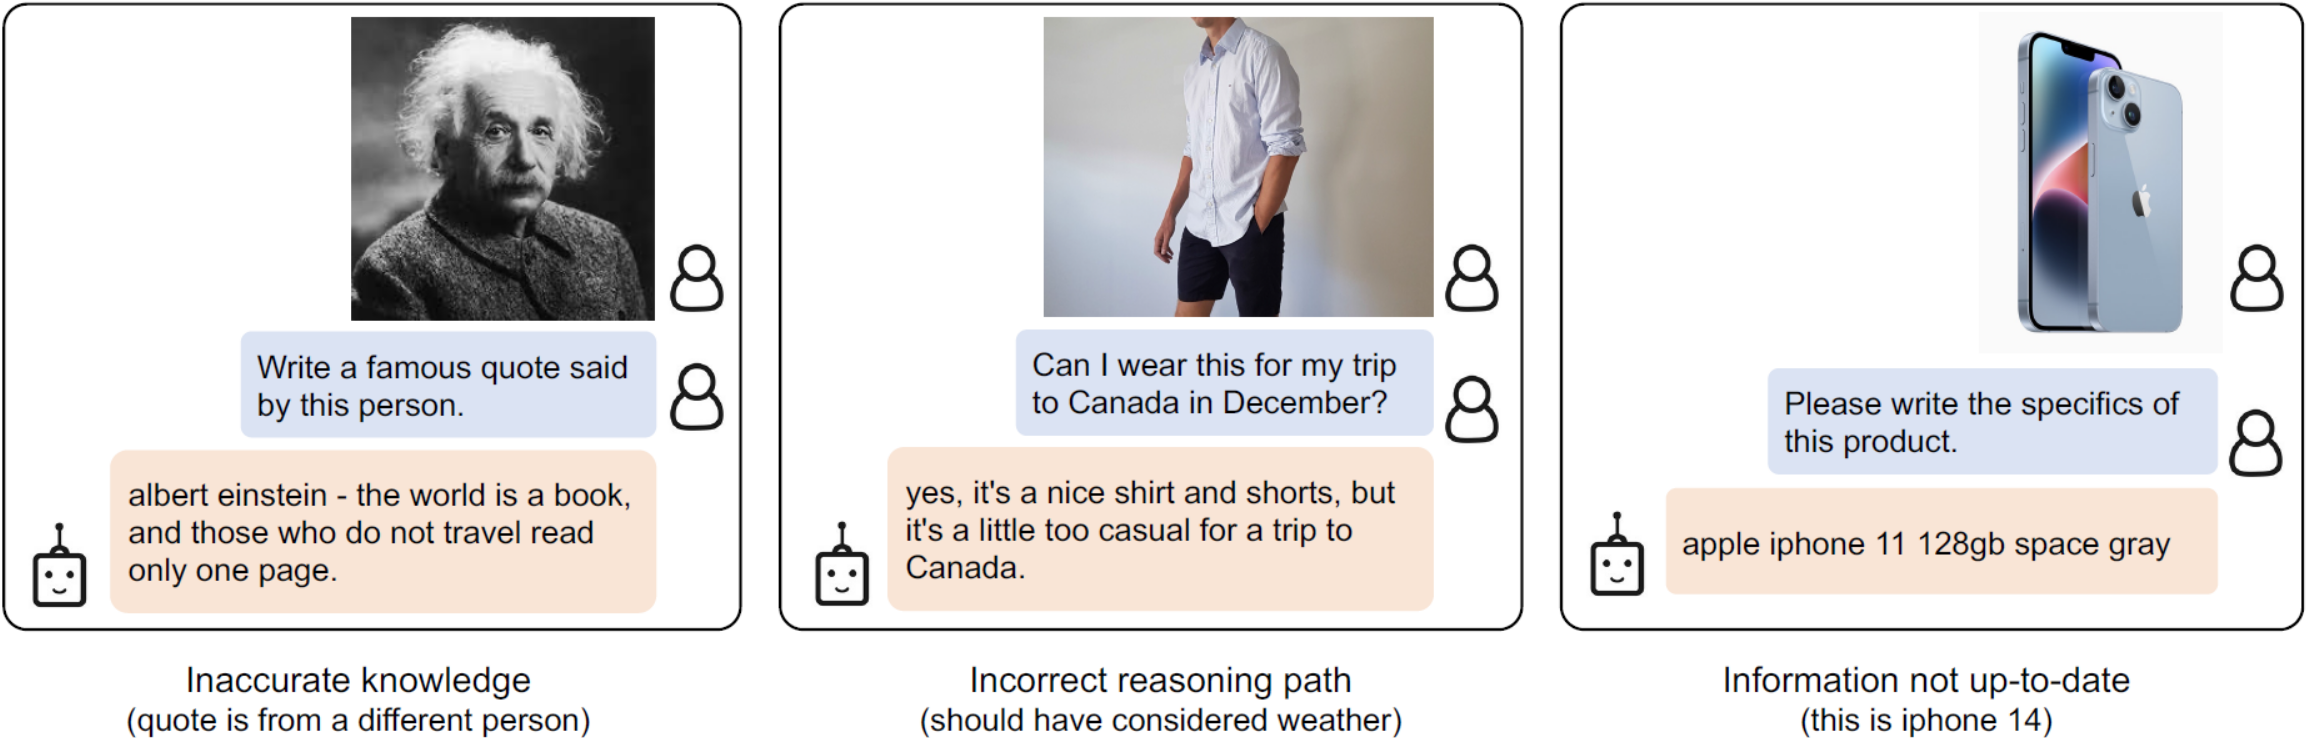
Figure 6. Incorrect output examples for instructed zero-shot image-to-text generation using a BLIP-2 model w/ ViT-g and FlanT5XXL.
图 6.使用带有 ViT-g 和 $\text{FlanT5}_\text{XXL}$ 的 BLIP-2 模型进行指令零样本图像到文本生成的错误输出示例。

# Conclusion
<!-- We propose BLIP-2, a generic and compute-efficient method for vision-language pre-training that leverages frozen pre-trained image encoders and LLMs. BLIP-2 achieves state-of-the-art performance on various vision-language tasks while having a small amount of trainable parameters during pre-training. BLIP-2 also demonstrates emerging capabilities in zero-shot instructed image-to-text generation. We consider BLIP-2 as an important step towards building a multimodal conversational AI agent. -->
我们提出了 BLIP-2, 一种通用且计算高效的视觉-语言预训练方法, 它利用冻结的预训练图像编码器和 LLMs。BLIP-2 在各种视觉-语言任务上实现最先进的性能, 同时在预训练期间具有少量可训练参数。BLIP-2 还展示了零样本指令图像到文本生成的新兴能力。我们认为 BLIP-2 是构建多模态对话式 AI 智能体的重要一步。

<span id='fig.7'></span> 
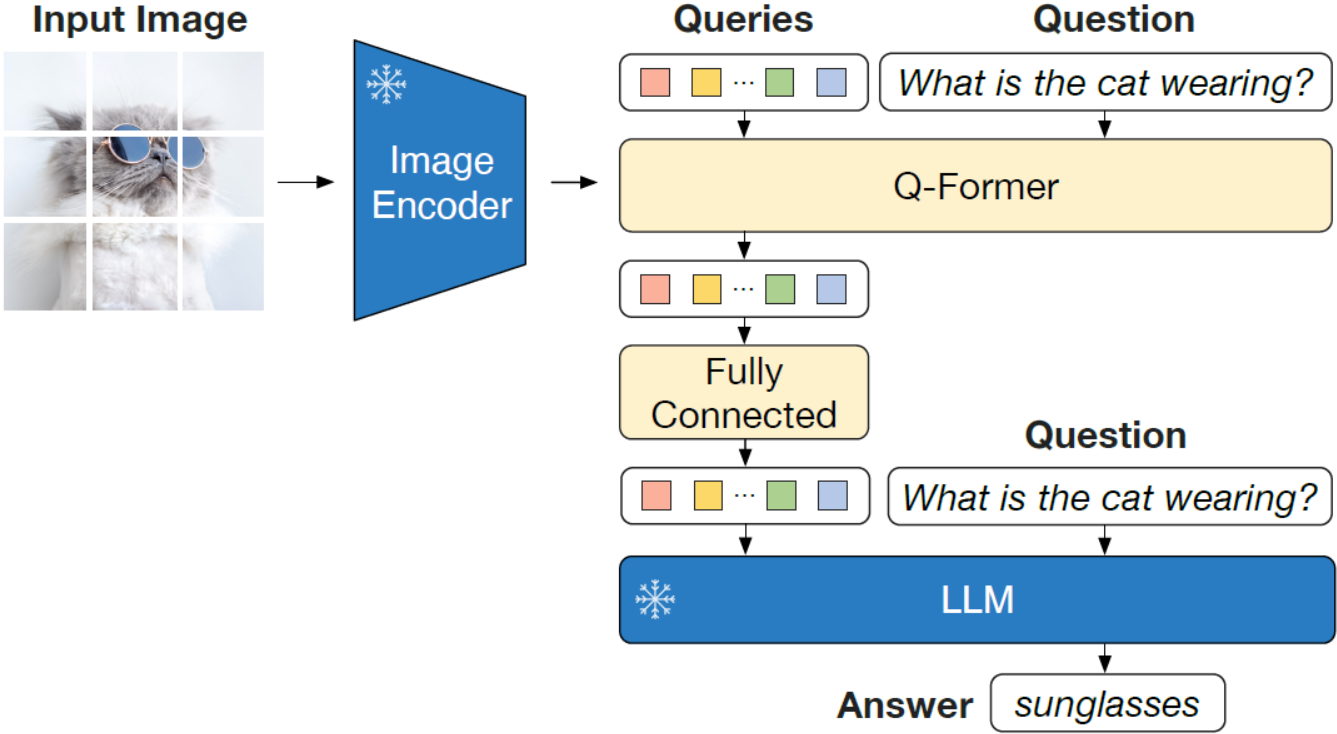
<!-- Figure 7. Model architecture for VQA finetuning, where the LLM receives Q-Former's output and the question as input, then predicts answers. We also provide the question as a condition to Q-Former, such that the extracted image features are more relevant to the question. -->
图7. VQA 微调的模型架构, 其中 LLM 接收 Q-Former 的输出和问题作为输入, 然后预测回答。我们还将问题作为条件提供给 Q-Former, 使得提取的图像特征与问题更相关。

- 模型代码注释
    - https://github.com/OpenDocCN/python-code-anls/blob/master/docs/hf-tfm/models----blip_2----modeling_blip_2.py.md
- notebooks
    - github-salesforce
        - [ ] Feature Extraction Example https://github.com/salesforce/LAVIS/blob/3446bac20c5646d35ae383ebe6d13cec4f8b00cb/examples/blip2_feature_extraction.ipynb\
        - [ ] Image-Text Matching Example https://github.com/salesforce/LAVIS/blob/3446bac20c5646d35ae383ebe6d13cec4f8b00cb/examples/blip2_image_text_matching.ipynb
        - [ ] instructed vision-to-language generation https://github.com/salesforce/LAVIS/blob/main/examples/blip2_instructed_generation.ipynb
    - huggingface-transformers
        - [x] [Zero-shot image-to-text generation with BLIP-2](https://github.com/huggingface/blog/blob/main/blip-2.md)
        - [x] [Full Fine-Tuning](https://github.com/huggingface/notebooks/blob/main/examples/image_captioning_blip.ipynb)
        - [x] [Parameter Efficient Fine-Tuning](https://github.com/huggingface/notebooks/blob/main/peft/Fine_tune_BLIP2_on_an_image_captioning_dataset_PEFT.ipynb)
        - [ ] [deploying BLIP-2 on Amazon SageMaker](https://github.com/aws-samples/amazon-sagemaker-genai-content-moderation/blob/main/blip2-sagemaker.ipynb)

- [PEFT](https://huggingface.co/docs/peft/index)

- [大模型超详细解读 (目录)](https://zhuanlan.zhihu.com/p/625926419)
- 翻译
    - [BLIP2中Q-former详解](https://blog.csdn.net/m0_37708614/article/details/134122314)
    - [x] [论文解读——BLIP-2: Bootstrapping Language-Image Pre-training with Frozen Image Encoders and Large Language Models](http://www.junphy.com/wordpress/index.php/2023/11/18/blip-2/)
    - [多模态超详细解读 (七)：BLIP-2：节约多模态训练成本：冻结预训练好的视觉语言模型参数](https://zhuanlan.zhihu.com/p/628375255)
    - [https://blog.csdn.net/m0_51976564/article/details/134356373](https://blog.csdn.net/m0_51976564/article/details/134356373)
    - [[BLIP/BLIP2/InstructBLIP] 图文多模态理解与生成](https://zhuanlan.zhihu.com/p/658350229)
    - [一文读懂BLIP和BLIP-2多模态预训练](https://zhuanlan.zhihu.com/p/640887802)
- 训练
    - [咱们边玩边学BLIP2](https://blog.csdn.net/RandyHan/article/details/134804888)
    - [BLIP系列文章小结（BLIP, BLIP-2, InstructBLIP）](http://www.myhz0606.com/article/blip_hub)
    - [十篇最新经典多模态论文梳理](https://blog.csdn.net/qq_27590277/article/details/130437284)
    - [多模态总结](https://yulong.buzz/article/multimodal)